# Tests

In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [2]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [3]:
R.<x,y> = RIF[]

In [4]:
System?

In [5]:
system = System(
    R,
    (x,y),
    [(4,5), (1,2)],
    [
        -y,
        x,
    ],
)

In [6]:
system.y

(-y, x)

In [7]:
reach = system.reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

calling reach with y0 = ['[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [8]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [9]:
reach.res

2

In [10]:
P = Atomic(x - 3); P

Atomic(x - 3)

computing sig
PolyObserver(x - 3, <flowstar.reachability.Reach object at 0x7f51c2310c80>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.21473461056256926 .. 0.80000000000000005], [4.7100807333397067 .. 5.6000000000000024], [6.3134824753956175 .. 6.4000000000000031]]
domain = [0.0000000000000000 .. 6.2821853071795868]
roots = [[0.21473461056256926 .. 0.80000000000000005], 
 [4.7100807333397067 .. 5.6000000000000024], 
 [6.3134824753956175 .. 6.4000000000000031]]
seg_domain = [0.0000000000000000 .. 6.2821853071795868]
roots = [[0.21473461056256926 .. 0.80000000000000005], 
 [4.7100807333397067 .. 5.6000000000000024], 
 [6.3134824753956175 .. 6.4000000000000031]]
signal given bool roots: 1 items in 0.00 seconds
generating plot
PolyObserver(x - 3, <flows

/usr/lib64/python3.7/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


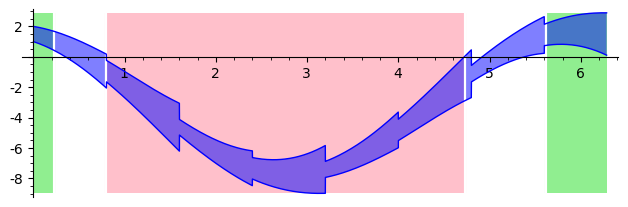

In [11]:
plt = P.visualize(reach=reach)
plt.show(aspect_ratio=1/6)

In [12]:
prop = {y: RIF(1, 5)} >> G(RIF(pi/8), Atomic(x + 0.5))

In [12]:
sig = prop.signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.01)
sig

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.07 seconds
Computed 63 flowpipes in 0.07286895700235618 sec
mask = None
calling reach with y0 = [('None', '[-4.5264988148012977 .. 4.5309838285159448]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5294495737230332 .. 4.5304673567368976]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.526498814801298..4.530983828515945]
C = [1.0..5.0]
S = [-4.529449573723033..4.530467356736898]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Compu

top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.04499346299780882 sec
ran "tentative eval" 4 times in 0.0020830631256103516
ran "capturing globals [on exit]" 9 times in 0.00019621849060058594
ran "prepare in check" 2 times in 3.62396240234375e-05
ran "whole domain eval" 3 times in 0.001886129379272461
ran "mask intersect check" 4 times in 1.049041748046875e-05
ran "check boolean [unguarded]" 2 times in 0.0018999576568

roots = [[0.15336990821572277 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15336990821572277 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15336990821572277 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.043990328997097095 sec
ran "tentative eval" 4 times in 0.002276182174682617
ran "capturing globals [on exit]" 9 times in 0.0001933574676513672
ran "prepare in check" 2 times in 3.8623809814453125e-05
ran "whole domain eval" 3 times in 0.0017139911651611328
ran "mask intersect check" 4 times in 1.3113021850585938e-05
ran "check boolean [unguarded]" 2 times in 0.0012040138244628906
ran "composing flowpipe" 4 times in 0.00330

calling reach with y0 = [('None', '[0.87633204657884267 .. 1.9260682847288167]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0230335041960012 .. 4.0602361641774536]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.8763320465788427..1.9260682847288166]
C = [1.0..5.0]
S = [3.0230335041960013..4.060236164177454]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.02 seconds
Computed 4 flowpipes in 0.021846046998689417 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.15056294312295798 .. 0.39469908169772422]]
domain

calling reach with y0 = [('None', '[0.75085066723533366 .. 1.8516085963165896]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0430088565354851 .. 4.1181954784881958]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.7508506672353337..1.8516085963165896]
C = [1.0..5.0]
S = [3.043008856535485..4.118195478488196]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.012757297999996808 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e1aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.11832928088318495 .. 0.39469908169772422]]
domain 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070df5f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.022330357998725958 sec
ran "tentative eval" 4 times in 

calling reach with y0 = [('None', '[0.59804395929755171 .. 1.7201639093835095]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0736903882772685 .. 4.1826977092535627]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.5980439592975517..1.7201639093835095]
C = [1.0..5.0]
S = [3.0736903882772686..4.182697709253563]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.011366251999788801 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071565f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domai

top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.03928151999753027 sec
ran "tentative eval" 4 times in 0.0017688274383544922
ran "capturing globals [on exit]" 9 times in 0.00017070770263671875
ran "prepare in check" 2 times in 2.7894973754882812e-05
ran "whole domain eval" 3 times in 0.0020456314086914062
ran "mask intersect check" 4 times in 1.0967254638671875e-05
ran "check boolean [unguarded]" 2 times in 0.001131772

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0714d230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.05 seconds
Monitored signal in 0.04924459599897091 sec
ran "tentative eval" 4 times in 0

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.024772061999101425 sec
ran "tentative eval" 4 times in 0.005698680877685547
ran "capturing globals [on exit]" 9 times in 8.511543273925781e-05
ran "prepare in check" 2 times in 1.4066696166992188e-05
ran "whole domain eval" 4 times in 0.001088857650756836
ran "mask intersect check" 4 times in 5.9604644775390625e-06
ran "check boolean [unguarded]" 2 times in 0.0009887218475341797
ran "composing flowpipe" 6 times in 0.0021331310272216797
ran "root amalgamation" 4 times in 1.0013580322265625e-05
ran "observer.check" 2 times in 0.001125335693359375
ran "post retrieve" 4 times in 1.6689300537109375e-05
ran "root detection" 4 times in 0.0023441314697265625
ran "restoring globals" 9 times in 0.00011897087097167969
calling reach with y0 = 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0714d8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.090118769833276893 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.090118769833276893 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.090118769833276893 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.05 seconds
Monitored signal in 0.04774167599680368 sec
ran "tentative eval" 4 times in 0

top-level root detection: 1 items in 0.02 seconds
roots = [[0.081533350511457214 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.081533350511457214 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.081533350511457214 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.05 seconds
Monitored signal in 0.0470200619984098 sec
ran "tentative eval" 4 times in 0.0018644332885742188
ran "capturing globals [on exit]" 9 times in 0.0001926422119140625
ran "prepare in check" 2 times in 3.814697265625e-05
ran "whole domain eval" 4 times in 0.0024225711822509766
ran "mask intersect check" 4 times in 1.1444091796875e-05
ran "check boolean [unguarded]" 2 times in 0.002925157546997070

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.072943266454836216 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.072943266454836216 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.072943266454836216 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.039711368997814134 sec
ran "tentative eval" 4 times in 

top-level root detection: 1 items in 0.02 seconds
roots = [[0.071261129432706654 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.071261129432706654 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.071261129432706654 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.043625405998682254 sec
ran "tentative eval" 4 times in 0.0031669139862060547
ran "capturing globals [on exit]" 9 times in 0.000164031982421875
ran "prepare in check" 2 times in 2.8848648071289062e-05
ran "whole domain eval" 4 times in 0.0019178390502929688
ran "mask intersect check" 4 times in 1.049041748046875e-05
ran "check boolean [unguarded]" 2 times in 0.00201225280

top-level root detection: 1 items in 0.01 seconds
roots = [[0.057557077221844846 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.057557077221844846 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.057557077221844846 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.028517963997728657 sec
ran "tentative eval" 4 times in 0.0013363361358642578
ran "capturing globals [on exit]" 9 times in 0.00012111663818359375
ran "prepare in check" 2 times in 4.1961669921875e-05
ran "whole domain eval" 4 times in 0.0019731521606445312
ran "mask intersect check" 4 times in 7.867813110351562e-06
ran "check boolean [unguarded]" 2 times in 0.001347541809

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e8230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.00026519985220997688 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.00026519985220997688 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.00026519985220997688 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.04 seconds
Monitored signal in 0.0384970679970138 sec
ran "tentative eval" 4 times

calling reach with y0 = [('None', '[-0.066136122260537667 .. 1.2019833323616110]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1419649682927612 .. 4.3917018536405097]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.06613612226053767..1.201983332361611]
C = [1.0..5.0]
S = [3.1419649682927613..4.39170185364051]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.00808747900009621 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.040915925624937898 .. 0.39469908169772422]]
doma

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07156c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.00041126994025500462 .. 0.39033623667596735]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.00041126994025500462 .. 0.39033623667596735]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.00041126994025500462 .. 0.39033623667596735]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023918981996757793 sec
ran "tentative eval" 4 times in 0.001194477081298

Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.010094621000462212 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.033845156998722814 sec
ran "tentative eval" 4 times in 0.0027141571044921875
ran "capturing globals [on exit]" 9 times in 0.00027823448181152344
ran "pre

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.38924777279122380 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38924777279122380 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38924777279122380 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.01 seconds
Monitored signal in 0.014205965997462044 sec
ran "tentative eval" 4 times in 0.0

roots = [[0.37488047799130880 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37488047799130880 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.015857487998800934 sec
ran "tentative eval" 4 times in 0.0008711814880371094
ran "capturing globals [on exit]" 9 times in 7.891654968261719e-05
ran "prepare in check" 2 times in 1.2874603271484375e-05
ran "whole domain eval" 1 times in 0.0003025531768798828
ran "mask intersect check" 4 times in 5.245208740234375e-06
ran "check boolean [unguarded]" 2 times in 0.0005855560302734375
ran "composing flowpipe" 2 times in 0.0005359649658203125
ran "root amalgamation" 1 times in 1.1920928955078125e-06
ran "observer.check" 2 times in 0.0

calling reach with y0 = [('None', '[-3.0217528249965371 .. -1.6006747673760113]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.7357594268911268 .. -2.3174154793552927]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.021752824996537..-1.6006747673760113]
C = [1.0..5.0]
S = [-3.7357594268911267..-2.317415479355293]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0068864960012433585 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e56e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.36042156241004030 .. 0.39469908169772422]]

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070ed140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.37408360845149896 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37408360845149896 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37408360845149896 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.01 seconds
Monitored signal in 0.014117583998086047 sec
ran "tentative eval" 4 times in 0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.35209566432791178 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35209566432791178 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35209566432791178 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.03334974099743704 sec
ran "tentative eval" 4 times in 0.0013184547424316406
ran "capturing globals [on exit]" 9 times in 0.00012087821960449219
ran "prepare in check" 2 times in 2.0503997802734375e-05
ran "whole domain eval" 1 times in 0.0004374980926513672
ran "mask intersect check" 4 times in 8.106231689453125e-06
ran "check boolean [unguarded]" 2 times in 0.0008008480072

Running Flow*: 1 items in 0.02 seconds
Computed 4 flowpipes in 0.01868882100097835 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f8500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.26343873356784708 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26343873356784708 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26343873356784708 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 ite

ran "prepare in check" 2 times in 4.982948303222656e-05
ran "whole domain eval" 2 times in 0.001817941665649414
ran "mask intersect check" 4 times in 1.2159347534179688e-05
ran "check boolean [unguarded]" 2 times in 0.0015566349029541016
ran "composing flowpipe" 3 times in 0.0028715133666992188
ran "root amalgamation" 2 times in 1.1920928955078125e-05
ran "observer.check" 2 times in 0.0018608570098876953
ran "post retrieve" 2 times in 2.3603439331054688e-05
ran "root detection" 2 times in 0.005342721939086914
ran "restoring globals" 9 times in 0.0002899169921875
calling reach with y0 = [('None', '[-2.7550483692429216 .. -1.4491440762051368]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8258848054963850 .. -2.5254071765118450]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.7550483692429215..-1.4491440762051369]
C = [1.0..5.0]
S = [-3.825884805496385..-2.525407176511845]
assigning system with dimension 2
resulting system has dimensio

calling reach with y0 = [('None', '[-2.6926447290598930 .. -1.3304507695834102]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9097243137884959 .. -2.5591391689757045]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.692644729059893..-1.3304507695834102]
C = [1.0..5.0]
S = [-3.909724313788496..-2.5591391689757046]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.010178898000958725 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.26417227238081897 .. 0.39469908169772422]]


ran "prepare in check" 2 times in 1.1682510375976562e-05
ran "whole domain eval" 2 times in 0.0005898475646972656
ran "mask intersect check" 4 times in 5.245208740234375e-06
ran "check boolean [unguarded]" 2 times in 0.000606536865234375
ran "composing flowpipe" 3 times in 0.0011255741119384766
ran "root amalgamation" 2 times in 2.6226043701171875e-06
ran "observer.check" 2 times in 0.0007212162017822266
ran "post retrieve" 2 times in 6.9141387939453125e-06
ran "root detection" 2 times in 0.0010991096496582031
ran "restoring globals" 9 times in 0.0001277923583984375
calling reach with y0 = [('None', '[-2.6610849285730818 .. -1.3101439593352592]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9226957801852845 .. -2.5767516619224228]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.6610849285730818..-1.3101439593352593]
C = [1.0..5.0]
S = [-3.9226957801852844..-2.576751661922423]
assigning system with dimension 2
resulting system has dim

top-level root detection: 1 items in 0.01 seconds
roots = [[0.27784372454333949 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27784372454333949 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27784372454333949 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.030254739998781588 sec
ran "tentative eval" 4 times in 0.002046346664428711
ran "capturing globals [on exit]" 9 times in 0.0001366138458251953
ran "prepare in check" 2 times in 2.2649765014648438e-05
ran "whole domain eval" 2 times in 0.0009987354278564453
ran "mask intersect check" 4 times in 9.059906005859375e-06
ran "check boolean [unguarded]" 2 times in 0.00100398063659

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f67d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.26284357894495141 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26284357894495141 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26284357894495141 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.03134559599675413 sec
ran "tentative eval" 4 times in 0.00

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.028795791997254128 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.030202330997781246 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f69b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.02811373199801892 sec
ran "tentative eval" 4 times in 0.00

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19355636907324172 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19355636907324172 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19355636907324172 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.02861424499860732 sec
ran "tentative eval" 4 times in 0.00

top-level root detection: 1 items in 0.01 seconds
roots = [[0.17050659664932452 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17050659664932452 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17050659664932452 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.0263541409985919 sec
ran "tentative eval" 4 times in 0.0012519359588623047
ran "capturing globals [on exit]" 9 times in 0.00010848045349121094
ran "prepare in check" 2 times in 3.147125244140625e-05
ran "whole domain eval" 3 times in 0.0011882781982421875
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 2 times in 0.0008218288421630859

ran "capturing globals [on exit]" 9 times in 0.00013709068298339844
ran "prepare in check" 2 times in 2.0742416381835938e-05
ran "whole domain eval" 3 times in 0.0013327598571777344
ran "mask intersect check" 4 times in 8.821487426757812e-06
ran "check boolean [unguarded]" 2 times in 0.0009074211120605469
ran "composing flowpipe" 4 times in 0.0035719871520996094
ran "root amalgamation" 3 times in 7.62939453125e-06
ran "observer.check" 2 times in 0.0011112689971923828
ran "post retrieve" 3 times in 1.9788742065429688e-05
ran "root detection" 3 times in 0.004074573516845703
ran "restoring globals" 9 times in 0.00019669532775878906
calling reach with y0 = [('None', '[-2.2717086595466976 .. -1.0191947476231895]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0597584688835716 .. -2.8085110123422438]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.2717086595466975..-1.0191947476231895]
C = [1.0..5.0]
S = [-4.0597584688835715..-2.80851101234

calling reach with y0 = [('None', '[-2.1132979865601001 .. -0.95549989878222385]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0449949523688851 .. -2.9324910589460944]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.1132979865601..-0.9554998987822239]
C = [1.0..5.0]
S = [-4.044994952368885..-2.9324910589460944]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.009841479999522562 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]


top-level root detection: 1 items in 0.01 seconds
roots = [[0.15252157229189394 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15252157229189394 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15252157229189394 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.017818638998505776 sec
ran "tentative eval" 4 times in 0.0008444786071777344
ran "capturing globals [on exit]" 9 times in 7.43865966796875e-05
ran "prepare in check" 2 times in 1.2636184692382812e-05
ran "whole domain eval" 3 times in 0.0009260177612304688
ran "mask intersect check" 4 times in 5.4836273193359375e-06
ran "check boolean [unguarded]" 2 times in 0.0005509853363

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.017105268998420797 sec
ran "tentative eval" 4 times in 0.0008509159088134766
ran "capturing globals [

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.017139014998974744 sec
ran "tentative eval" 4 times in 

0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.019457964999674005 sec
ran "tentative eval" 4 times in 0.0008783340454101562
ran "capturing globals [on exit]" 9 times in 7.677078247070312e-05
ran "prepare in check" 2 times in 1.239776611328125e-05
ran "whole domain eval" 4 times in 0.0010433197021484375
ran "mask intersect check" 4 times in 5.0067901611328125e-06
ran "check boolean [unguarded]" 2 times in 0.0009987354278564453
ran "composing flowpipe" 6 times in 0.0020685195922851562
ran "root amalgamation" 4 times in 5.4836273193359375e-06
ran "observer.check" 2 times in 0.0011334419250488281
ran "post retrieve" 4 times in 1.3589859008789062e-05
ran "root detection" 4 times in 0.003080606460571289
ran "restoring globals" 9 times in 0.00011754035949707031
calling reach with y0 = [('None', '[-1.9314718057302094 .. -0.7

calling reach with y0 = [('None', '[-1.8947170165059948 .. -0.72913297693014378]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.1525582175669565 .. -2.9988762782659290]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.8947170165059948..-0.7291329769301438]
C = [1.0..5.0]
S = [-4.152558217566956..-2.998876278265929]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0070994189991324674 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.070612896418037127 .. 0.39469908169772422

calling reach with y0 = [('None', '[-1.7921260293973838 .. -0.69990235296700631]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.1383582359938958 .. -3.0602883297172285]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.7921260293973837..-0.6999023529670063]
C = [1.0..5.0]
S = [-4.138358235993896..-3.0602883297172285]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006456076998802018 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.062233468999600090 .. 0.39469908169772422

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.031662671997764846 sec
ran "tentative eval" 4 times in 0.001291513442993164
ran "capturing globals [on exit]" 9 times in 0.0001163482666015625
ran "prepare in check" 1 times in 1.2159347534179688e-05
ran "whole domain eval" 4 times in 0.001920938491821289
ran "mask intersect check" 4 times in 7.3909759521484375e-06
ran "check boolean [unguarded]" 1 times in 0.000865936279296875
ran "composing flowpipe" 5 times in 0.

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e55f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.022690470997986267 sec
ran "tentative eval" 4 times in 0.0011353492736816406
ran "capturing globals [

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.025932258999091573 sec
ran "tentative eval" 4 times in 0.001226663589477539
ran "capturing globals [o

0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.027173216998562566 sec
ran "tentative eval" 4 times in 0.001257181167602539
ran "capturing globals [on exit]" 9 times in 0.0001227855682373047
ran "prepare in check" 1 times in 1.049041748046875e-05
ran "whole domain eval" 4 times in 0.0015532970428466797
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 1 times in 0.0008025169372558594
ran "composing flowpipe" 5 times in 0.005387067794799805
ran "root amalgamation" 4 times in 8.106231689453125e-06
ran "observer.check" 1 times in 0.0009105205535888672
ran "post retrieve" 4 times in 2.2172927856445312e-05
ran "root detection" 4 times in 0.0028383731842041016
ran "restoring globals" 9 times in 0.00015616416931152344
calling reach with y0 = [('None', '[-1.6031271618070107 .. -0.44270569

Running Flow*: 1 items in 0.00 seconds
Computed 4 flowpipes in 0.004606507000062265 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070e5050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.0

roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.020076315997357597 sec
ran "tentative eval" 4 times in 0.0008559226989746094
ran "capturing globals [on exit]" 9 times in 7.414817810058594e-05
ran "prepare in check" 1 times in 6.9141387939453125e-06
ran "whole domain eval" 4 times in 0.0010514259338378906
ran "mask intersect check" 4 times in 4.76837158203125e-06
ran "check boolean [unguarded]" 1 times in 0.0005776882171630859
ran "composing flowpipe" 5 times in 0.002220630645751953
ran "root amalgamation" 4 times in 5.0067901611328125e-06
ran "observer.check" 1 times in 0.0006501674652099609
ran "post retrieve" 4 times in 1.3828277587890625e-05
ran "root detection" 4 times in 0.0019910335540771484
ran "restoring globals" 9 ti

ran "root amalgamation" 4 times in 5.9604644775390625e-06
ran "observer.check" 1 times in 0.0006475448608398438
ran "post retrieve" 4 times in 1.6450881958007812e-05
ran "root detection" 4 times in 0.001980304718017578
ran "restoring globals" 9 times in 0.00011968612670898438
calling reach with y0 = [('None', '[-1.4006687645717500 .. -0.19130544343640396]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3212438806245138 .. -3.1290478113855040]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.40066876457175..-0.19130544343640396]
C = [1.0..5.0]
S = [-4.321243880624514..-3.129047811385504]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.00 seconds
Computed 4 flowpipes in 0.004265781999492901 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unprecondi

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.018131925997295184 sec
ran "tentative eval" 4 times in 0.0008318424224853516
ran "capturing globals [on exit]" 9 times in 7.510185241699219e-05
ran "prepare in check" 1 times in 7.152557373046875e-06
ran "whole domain eval" 4 times in 0.0010273456573486328
ran "mask intersect check" 4 times in 5.245208740234375e-06
ran "check boolean [unguarded]" 1 times in 0.0005671977996826172
ran "composing flowpipe" 5 times in 0

calling reach with y0 = [('None', '[-1.3045736239364690 .. -0.058075726476573205]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3624540601703004 .. -3.1332836531342209]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.304573623936469..-0.058075726476573206]
C = [1.0..5.0]
S = [-4.3624540601703..-3.133283653134221]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0070978329986246536 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07107d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.024465500997393974 sec
ran "tentative eval" 4 times in 0.0012216567993164062
ran "capturing globals [

S = [-4.3999649771669285..-3.1342481750545]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006845889000032912 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 sec

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071098c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.02394793799976469 sec
ran "tentative eval" 4 times in 0.0011107921600341797
ran "capturing globals [o

roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.027128732997880434 sec
ran "tentative eval" 4 times in 0.0011487007141113281
ran "capturing globals [on exit]" 9 times in 0.00010561943054199219
ran "prepare in check" 1 times in 1.049041748046875e-05
ran "whole domain eval" 4 times in 0.0022225379943847656
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 1 times in 0.0007915496826171875
ran "composing flowpipe" 5 times in 0.0027091503143310547
ran "root amalgamation" 4 times in 6.9141387939453125e-06
ran "observer.check" 1 times in 0.0008950233459472656
ran "post retrieve" 4 

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.008741960000406834 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.392699081698

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0710c140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.02448822899714287 sec
ran "tentative eval" 4 times in 0.0011687278747558594
ran "capturing globals [o

calling reach with y0 = [('None', '[-0.91630941147224399 .. 0.43482644053408643]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4675932019739105 .. -3.1349711948193159]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.916309411472244..0.4348264405340864]
C = [1.0..5.0]
S = [-4.46759320197391..-3.134971194819316]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0061091429997759406 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
do

calling reach with y0 = [('None', '[-0.87785325755993360 .. 0.48972447112744655]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4784850517434994 .. -3.1292975385413028]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.8778532575599336..0.48972447112744655]
C = [1.0..5.0]
S = [-4.478485051743499..-3.129297538541303]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.011605581999901915 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]


top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.022104163997937576 sec
ran "tentative eval" 4 times in 0.0011205673217773438
ran "capturing globals [on exit]" 9 times in 9.989738464355469e-05
ran "prepare in check" 1 times in 9.5367431640625e-06
ran "whole domain eval" 4 times in 0.0017559528350830078
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 1 times in 0.000762939453125
ran "composing flowpipe" 5 times in 0.0026

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f6230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023079149998011417 sec
ran "tentative eval" 4 times in 0.0011074542999267578
ran "capturing globals [

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070f68c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.026894524997260305 sec
ran "tentative eval" 4 times in 0.001131296157836914
ran "capturing globals [o

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.02818799299893726 sec
ran "tentative eval" 4 times in 0.0012030601501464844
ran "capturing globals [on exit]" 9 times in 0.00010776519775390625
ran "prepare in check" 1 times in 1.0728836059570312e-05
ran "whole domain eval" 4 times in 0.0013988018035888672
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 1 times in 0.0007944107055664062
ran "composing flowpipe" 5 times in 0.0030655860900878906
ran "root amalgamation" 4 times in 8.106231689453125e-06
ran "observer.check" 1 times in 0.0009005069732666016
ran "post retrieve" 4 times in 1.9073486328125e-05
ran "root detection" 4 times in 0.002750873565673828
ran "restoring globals" 9 times in 0.0001628398895263672
calling reach with y0 = [('

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07106230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023597826999321114 sec
ran "tentative eval" 4 times in 0.0012316703796386719
ran "capturing globals [

ran "capturing globals [on exit]" 9 times in 0.00011086463928222656
ran "prepare in check" 1 times in 9.059906005859375e-06
ran "whole domain eval" 4 times in 0.0016448497772216797
ran "mask intersect check" 4 times in 6.4373016357421875e-06
ran "check boolean [unguarded]" 1 times in 0.0007412433624267578
ran "composing flowpipe" 5 times in 0.0026102066040039062
ran "root amalgamation" 4 times in 7.867813110351562e-06
ran "observer.check" 1 times in 0.0008356571197509766
ran "post retrieve" 4 times in 1.9788742065429688e-05
ran "root detection" 4 times in 0.0026476383209228516
ran "restoring globals" 9 times in 0.0001456737518310547
calling reach with y0 = [('None', '[-0.55785442030488508 .. 0.91507815170704255]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5162658260456077 .. -3.0911229565798463]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.5578544203048851..0.9150781517070425]
C = [1.0..5.0]
S = [-4.516265826045608..-3.09112295

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.02314111599844182 sec
ran "tentative eval" 4 times in 0.0011506080627441406
ran "capturing globals [on exit]" 9 times in 9.822845458984375e-05
ran "prepare in check" 1 times in 9.059906005859375e-06
ran "whole domain eval" 4 times in 0.0018506050109863281
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 1 times in 0.0007920265197753906
ran "composing flowpipe" 5 times in 0

ran "root amalgamation" 4 times in 4.76837158203125e-06
ran "observer.check" 1 times in 0.0006158351898193359
ran "post retrieve" 4 times in 1.3828277587890625e-05
ran "root detection" 4 times in 0.0019092559814453125
ran "restoring globals" 9 times in 0.00011849403381347656
calling reach with y0 = [('None', '[-0.40120136017165787 .. 1.0213439943521042]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4864002006880242 .. -3.1014927043322670]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.40120136017165786..1.021343994352104]
C = [1.0..5.0]
S = [-4.486400200688024..-3.101492704332267]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.00 seconds
Computed 4 flowpipes in 0.004426809000506182 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditi

top-level root detection: 1 items in 0.01 seconds
roots = [[0.068933153629324478 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.068933153629324478 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.068933153629324478 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.025158083997666836 sec
ran "tentative eval" 4 times in 0.001199960708618164
ran "capturing globals [on exit]" 9 times in 0.00010585784912109375
ran "prepare in check" 2 times in 1.6927719116210938e-05
ran "whole domain eval" 4 times in 0.0014157295227050781
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 2 times in 0.00132560729980

calling reach with y0 = [('None', '[-0.30617786829010685 .. 1.1315641230696519]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4942947376721972 .. -3.0750688632555380]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.30617786829010685..1.1315641230696518]
C = [1.0..5.0]
S = [-4.494294737672197..-3.075068863255538]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.005988388000332634 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071558c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.096744204952445830 .. 0.39469908169772422]]

top-level root detection: 1 items in 0.01 seconds
roots = [[0.099999999999999991 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.099999999999999991 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.021496214998478536 sec
ran "tentative eval" 4 times in 0.0011780261993408203
ran "capturing globals [on exit]" 9 times in 9.942054748535156e-05
ran "prepare in check" 2 times in 1.5735626220703125e-05
ran "whole domain eval" 3 times in 0.0011467933654785156
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 2 times in 0.000788450

ran "prepare in check" 2 times in 1.6689300537109375e-05
ran "whole domain eval" 3 times in 0.0011365413665771484
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 2 times in 0.0007412433624267578
ran "composing flowpipe" 4 times in 0.002975940704345703
ran "root amalgamation" 3 times in 6.198883056640625e-06
ran "observer.check" 2 times in 0.0009081363677978516
ran "post retrieve" 3 times in 1.4543533325195312e-05
ran "root detection" 3 times in 0.002096891403198242
ran "restoring globals" 9 times in 0.0001468658447265625
calling reach with y0 = [('None', '[-0.21256149401587416 .. 1.2972453468111083]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5040389765436162 .. -3.0303537935847271]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.21256149401587415..1.2972453468111083]
C = [1.0..5.0]
S = [-4.504038976543616..-3.030353793584727]
assigning system with dimension 2
resulting system has dimension 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.15936921377232746 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15936921377232746 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15936921377232746 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023866946998168714 sec
ran "tentative eval" 4 times in 0.0011844635009765625
ran "capturing globals [on exit]" 9 times in 0.00010466575622558594
ran "prepare in check" 2 times in 1.5974044799804688e-05
ran "whole domain eval" 3 times in 0.0015316009521484375
ran "mask intersect check" 4 times in 7.3909759521484375e-06
ran "check boolean [unguarded]" 2 times in 0.00078606605

roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.01562212799944973 sec
ran "tentative eval" 4 times in 0.0009198188781738281
ran "capturing globals [on exit]" 9 times in 7.915496826171875e-05
ran "prepare in check" 2 times in 1.3113021850585938e-05
ran "whole domain eval" 2 times in 0.0006115436553955078
ran "mask intersect check" 4 times in 5.7220458984375e-06
ran "check boolean [unguarded]" 2 times in 0.0006153583526611328
ran "composing flowpipe" 3 times in 0.0011432170867919922
ran "root amalgamation" 2 times in 2.6226043701171875e-06
ran "observer.check" 2 times in 0.0007

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0060025139991921606 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 sec

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0710c8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.26381295845884306 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26381295845884306 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26381295845884306 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.016237961999649997 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0714d6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.28663040060071193 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28663040060071193 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28663040060071193 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.015237070998409763 sec
ran "tentative eval" 4 times in 0.0

running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.018588127997645643 sec
ran "tentative eval" 4 times in 0.0009517669677734375
ran "capturing globals [on exit]" 9 times in 8.368492126464844e-05
ran "prepare in check" 2 times in 1.8835067749023438e-05
ran "whole domain eval" 1 times in 0.000301361083984375
ran "mask intersect check" 4 times in 5.0067901611328125e-06
ran "check boolean [unguarded]" 2 times in 0.000904083251953125
ran "composing flowpipe" 2 times in 0.0005681514739990234
ran "root amalgamation" 1 times in 1.430511474609375e-06
ran "observer.check" 2 times in 0.0010976791381835938
ran "post retrieve" 1 times in 3.814697265625e-06
ran "root detection" 1 times in 0.0005562305450439453
ran "restoring globals" 9 times in 0.000123739

calling reach with y0 = [('None', '[0.32256661472130732 .. 1.7854756261241498]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3808748610250686 .. -2.9341202822636271]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.3225666147213073..1.7854756261241498]
C = [1.0..5.0]
S = [-4.3808748610250685..-2.934120282263627]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0055826289990363875 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0714d140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.37481819385556480 .. 0.39469908169772422]]
d

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.37928164620772186 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37928164620772186 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37928164620772186 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.024573798998972052 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071508c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.015369270999144646 sec
ran "tentative eval" 4 times in 0.0011210441589355469
ran "capturing globals [on exit]" 9 times in 0.00010323524475097656
ran "prepare in check" 1 times in 1.33514404296875e-05
ran "mask intersect check" 4 times in 2.0027160644531

ran "capturing globals [on exit]" 9 times in 0.00010037422180175781
ran "prepare in check" 1 times in 1.0251998901367188e-05
ran "mask intersect check" 4 times in 7.867813110351562e-06
ran "check boolean [unguarded]" 1 times in 8.58306884765625e-06
ran "observer.check" 1 times in 0.000102996826171875
ran "restoring globals" 9 times in 0.00016307830810546875
calling reach with y0 = [('None', '[1.9866284844065091 .. 4.1062106991798526]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.3954391418868318 .. -0.93170747502332862]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.9866284844065092..4.106210699179853]
C = [1.0..5.0]
S = [-3.3954391418868317..-0.9317074750233286]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.0068567389989766525 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Re

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071508c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.28297540858457870 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28297540858457870 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28297540858457870 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.02077245899818081 sec
ran "tentative eval" 4 times in 0.00

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071168c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.38760021559421542 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38760021559421542 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38760021559421542 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.01923823999823071 sec
ran "tentative eval" 4 times in 0.00

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.37735802719067018 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37735802719067018 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37735802719067018 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.018324127997402684 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071069b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.39169941981205663 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.39169941981205663 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.39169941981205663 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.017454626999096945 sec
ran "tentative eval" 4 times in 0.0

calling reach with y0 = [('None', '[2.5515391266895539 .. 4.0388721252366207]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.1520926125529298 .. 2.6574427748559160]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.551539126689554..4.038872125236621]
C = [1.0..5.0]
S = [1.1520926125529298..2.657442774855916]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.010695143000702956 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.37777660681635910 .. 0.39469908169772422]]
domain = 

0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.015693929999542888 sec
ran "tentative eval" 4 times in 0.0008816719055175781
ran "capturing globals [on exit]" 9 times in 7.510185241699219e-05
ran "prepare in check" 2 times in 1.2159347534179688e-05
ran "whole domain eval" 1 times in 0.0002970695495605469
ran "mask intersect check" 4 times in 5.9604644775390625e-06
ran "check boolean [unguarded]" 2 times in 0.0005879402160644531
ran "composing flowpipe" 2 times in 0.0005621910095214844
ran "root amalgamation" 1 times in 1.6689300537109375e-06
ran "observer.check" 2 times in 0.0007140636444091797
ran "post retrieve" 1 times in 4.0531158447265625e-06
ran "root detection" 1 times in 0.0010824203491210938
ran "restoring globals" 9 times in 0.00011420249938964844
calling reach with y0 = [('None', '[2.5186242416756230 .. 4.0

ran "capturing globals [on exit]" 9 times in 7.772445678710938e-05
ran "prepare in check" 2 times in 1.1682510375976562e-05
ran "whole domain eval" 1 times in 0.0003097057342529297
ran "mask intersect check" 4 times in 5.4836273193359375e-06
ran "check boolean [unguarded]" 2 times in 0.0005993843078613281
ran "composing flowpipe" 2 times in 0.0005643367767333984
ran "root amalgamation" 1 times in 1.1920928955078125e-06
ran "observer.check" 2 times in 0.0007147789001464844
ran "post retrieve" 1 times in 3.814697265625e-06
ran "root detection" 1 times in 0.001093149185180664
ran "restoring globals" 9 times in 0.00011587142944335938
calling reach with y0 = [('None', '[2.4509785674310284 .. 3.9870180710672006]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.2605325212140980 .. 2.8047934117636664]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.4509785674310285..3.9870180710672005]
C = [1.0..5.0]
S = [1.260532521214098..2.8047934117636664]
a

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006164460000945837 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.34157859692495662 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.34157859692495662 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.34157859692495662 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seco

ran "whole domain eval" 1 times in 0.00038623809814453125
ran "mask intersect check" 4 times in 7.152557373046875e-06
ran "check boolean [unguarded]" 2 times in 0.0007696151733398438
ran "composing flowpipe" 2 times in 0.0007216930389404297
ran "root amalgamation" 1 times in 2.6226043701171875e-06
ran "observer.check" 2 times in 0.0009224414825439453
ran "post retrieve" 1 times in 4.76837158203125e-06
ran "root detection" 1 times in 0.0015723705291748047
ran "restoring globals" 9 times in 0.0001533031463623047
calling reach with y0 = [('None', '[2.4489083325063969 .. 3.8618378373855591]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.4208242166011091 .. 2.8401909844231388]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.448908332506397..3.861837837385559]
C = [1.0..5.0]
S = [1.4208242166011091..2.8401909844231388]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 

calling reach with y0 = [('None', '[2.3959667768264201 .. 3.8352650508211990]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.4655857929254865 .. 2.9109659907658206]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.39596677682642..3.835265050821199]
C = [1.0..5.0]
S = [1.4655857929254865..2.9109659907658205]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006835560001491103 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.35140254968163781 .. 0.39469908169772422]]
domain = 

roots = [[0.30880460685719018 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.019894053997632 sec
ran "tentative eval" 4 times in 0.0011386871337890625
ran "capturing globals [on exit]" 9 times in 0.00010323524475097656
ran "prepare in check" 2 times in 1.621246337890625e-05
ran "whole domain eval" 1 times in 0.0003859996795654297
ran "mask intersect check" 4 times in 7.3909759521484375e-06
ran "check boolean [unguarded]" 2 times in 0.0007638931274414062
ran "composing flowpipe" 2 times in 0.0007185935974121094
ran "root amalgamation" 1 times in 2.86102294921875e-06
ran "observer.check" 2 times in 0.0009224414825439453
ran "post retrieve" 1 times in 5.245208740234375e-06
ran "root detection" 1 times in 0.0014388561

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07155320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.31790813746172041 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.31790813746172041 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.31790813746172041 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.018628489997354336 sec
ran "tentative eval" 4 times in 0.0

ran "tentative eval" 4 times in 0.0011432170867919922
ran "capturing globals [on exit]" 9 times in 0.00010132789611816406
ran "prepare in check" 2 times in 1.6450881958007812e-05
ran "whole domain eval" 1 times in 0.0003829002380371094
ran "mask intersect check" 4 times in 6.67572021484375e-06
ran "check boolean [unguarded]" 2 times in 0.0007748603820800781
ran "composing flowpipe" 2 times in 0.0007266998291015625
ran "root amalgamation" 1 times in 1.9073486328125e-06
ran "observer.check" 2 times in 0.0009264945983886719
ran "post retrieve" 1 times in 5.0067901611328125e-06
ran "root detection" 1 times in 0.000701904296875
ran "restoring globals" 9 times in 0.0001442432403564453
calling reach with y0 = [('None', '[2.2101604366193532 .. 3.7507437715326715]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.5931214993680860 .. 3.1436400723968650]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.2101604366193532..3.7507437715326715]
C = [1.0..

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070fe410>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.01616866899712477 sec
ran "tentative eval" 4 times in 0.00

calling reach with y0 = [('None', '[2.2240329931344495 .. 3.6091811127318901]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.7535739242317327 .. 3.1418311136069841]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.2240329931344496..3.60918111273189]
C = [1.0..5.0]
S = [1.7535739242317328..3.141831113606984]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.00653368799976306 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [

calling reach with y0 = [('None', '[2.1655816499489688 .. 3.5765200945931497]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.7941612590035003 .. 3.2078797985028516]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.165581649948969..3.5765200945931497]
C = [1.0..5.0]
S = [1.7941612590035003..3.2078797985028515]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.014898082001309376 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07156140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.01 seconds
Monitored signal in 0.013438051997582079 sec
ran "tentative eval" 4 times in 0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.29377425518144212 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29377425518144212 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29377425518144212 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.02070713099783461 sec
ran "tentative eval" 4 times in 0.00115203857421875
ran "capturing globals [on exit]" 9 times in 0.000102996826171875
ran "prepare in check" 2 times in 1.7404556274414062e-05
ran "whole domain eval" 2 times in 0.0007443428039550781
ran "mask intersect check" 4 times in 7.3909759521484375e-06
ran "check boolean [unguarded]" 2 times in 0.0007615089416503

Monitored signal in 0.028805920997911016 sec
ran "tentative eval" 4 times in 0.0012624263763427734
ran "capturing globals [on exit]" 9 times in 0.00011658668518066406
ran "prepare in check" 2 times in 1.71661376953125e-05
ran "whole domain eval" 3 times in 0.004268646240234375
ran "mask intersect check" 4 times in 9.059906005859375e-06
ran "check boolean [unguarded]" 2 times in 0.000789642333984375
ran "composing flowpipe" 4 times in 0.002340078353881836
ran "root amalgamation" 3 times in 6.9141387939453125e-06
ran "observer.check" 2 times in 0.0009593963623046875
ran "post retrieve" 3 times in 2.288818359375e-05
ran "root detection" 3 times in 0.0030472278594970703
ran "restoring globals" 9 times in 0.00019502639770507812
calling reach with y0 = [('None', '[1.4740106306205120 .. 3.4624421890892876]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.9211240839217760 .. 3.8280159946212638]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.474

top-level root detection: 1 items in 0.01 seconds
roots = [[0.28124396374278870 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28124396374278870 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28124396374278870 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023549612997157965 sec
ran "tentative eval" 4 times in 0.0011017322540283203
ran "capturing globals [on exit]" 9 times in 9.894371032714844e-05
ran "prepare in check" 2 times in 1.6689300537109375e-05
ran "whole domain eval" 2 times in 0.0007278919219970703
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 2 times in 0.000754356384

top-level root detection: 1 items in 0.01 seconds
roots = [[0.28732124283543009 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28732124283543009 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28732124283543009 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.021238263998384355 sec
ran "tentative eval" 4 times in 0.0011534690856933594
ran "capturing globals [on exit]" 9 times in 0.00010323524475097656
ran "prepare in check" 2 times in 1.71661376953125e-05
ran "whole domain eval" 2 times in 0.0007681846618652344
ran "mask intersect check" 4 times in 6.9141387939453125e-06
ran "check boolean [unguarded]" 2 times in 0.0007777214050

integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.007754119998935494 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07156500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.27595898634500309 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27595898634500309 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27595898634500309 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.5000000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.27028952142518203 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27028952142518203 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27028952142518203 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023523579999164212 sec
ran "tentative eval" 4 times in 0.0

S = [2.1489013329508415..3.550064132016819]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006051574999219156 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070a1140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.26465148232138430 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26465148232138430 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26465148232138430 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
s

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.25325564953772550 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25325564953772550 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25325564953772550 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.0215916909983207 sec
ran "tentative eval" 4 times in 0.001

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070fe500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.24577531517003120 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.24577531517003120 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.24577531517003120 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.0155533059987647 sec
ran "tentative eval" 4 times in 0.000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070fe500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.23402965995957783 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.23402965995957783 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.23402965995957783 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.016019770999264438 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.23436755788473861 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.23436755788473861 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.23436755788473861 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.017873375998533447 sec
ran "tentative eval" 4 times in 0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.20458993008547474 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.20458993008547474 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.20458993008547474 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.021307471997715766 sec
ran "tentative eval" 4 times in 0.0011942386627197266
ran "capturing globals [on exit]" 9 times in 0.00010514259338378906
ran "prepare in check" 2 times in 1.9073486328125e-05
ran "whole domain eval" 2 times in 0.0019159317016601562
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 2 times in 0.0007953643798828125

S = [2.436948158408014..3.7845388839450678]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006860273000711459 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
s

calling reach with y0 = [('None', '[1.3895135301579231 .. 2.8276832496996037]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.4635171907037878 .. 3.8546537538718338]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.3895135301579231..2.8276832496996036]
C = [1.0..5.0]
S = [2.463517190703788..3.8546537538718337]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.013017392999245203 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain 

C = [1.0..5.0]
S = [2.4734311654232597..3.853909609555417]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006649433000347926 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.39

running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.019992825998997432 sec
ran "tentative eval" 4 times in 0.00113677978515625
ran "capturing globals [on exit]" 9 times in 0.00011372566223144531
ran "prepare in check" 2 times in 2.0742416381835938e-05
ran "whole domain eval" 2 times in 0.0007369518280029297
ran "mask intersect check" 4 times in 7.3909759521484375e-06
ran "check boolean [unguarded]" 2 times in 0.0007729530334472656
ran "composing flowpipe" 3 times in 0.0014073848724365234
ran "root amalgamation" 2 times in 3.5762786865234375e-06
ran "observer.check" 2 times in 0.0009877681732177734
ran "post retrieve" 2 times in 9.059906005859375e-06
ran "root detection" 2 times in 0.0013914108276367188
ran "restoring globals" 9 times in 0.0001

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19692478009417538 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19692478009417538 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19692478009417538 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.018725975998677313 sec
ran "tentative eval" 4 times in 0.0009212493896484375
ran "capturing globals [on exit]" 9 times in 8.559226989746094e-05
ran "prepare in check" 2 times in 1.4066696166992188e-05
ran "whole domain eval" 3 times in 0.0008900165557861328
ran "mask intersect check" 4 times in 5.4836273193359375e-06
ran "check boolean [unguarded]" 2 times in 0.000624895095

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd070a0050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.020494078997217002 sec
ran "tentative eval" 4 times in 0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071165f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19132561617876209 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19132561617876209 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19132561617876209 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.02 seconds
Monitored signal in 0.023440845998266013 sec
ran "tentative eval" 4 times in 0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.17541877835132263 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17541877835132263 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17541877835132263 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000000000000? > 0): 1 items in 0.03 seconds
Monitored signal in 0.02583062799749314 sec
ran "tentative eval" 4 times in 0.001260995864868164
ran "capturing globals [on exit]" 9 times in 0.000110626220703125
ran "prepare in check" 2 times in 1.811981201171875e-05
ran "whole domain eval" 3 times in 0.0017719268798828125
ran "mask intersect check" 4 times in 7.62939453125e-06
ran "check boolean [unguarded]" 2 times in 0.0008211135864257812
r

integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.00628790399969148 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.17910591902858688 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17910591902858688 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17910591902858688 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitoring Signal for G([0.39269908169872413 .. 0.39269908169872420], x + 0.50000000

calling reach with y0 = [('None', '[1.1074324125790717 .. 2.2607088229136659]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8502990114488508 .. 3.9835450409808853]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.1074324125790718..2.260708822913666]
C = [1.0..5.0]
S = [2.850299011448851..3.9835450409808852]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.00 seconds
Computed 4 flowpipes in 0.004833503999179811 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.17615532028193875 .. 0.39469908169772422]]
domain =

calling reach with y0 = [('None', '[1.0583805631799683 .. 2.2080335132655993]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8709624058151130 .. 4.0104482739225560]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.0583805631799683..2.2080335132655993]
C = [1.0..5.0]
S = [2.870962405815113..4.010448273922556]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.00 seconds
Computed 4 flowpipes in 0.004841546000534436 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.17050566906943542 .. 0.39469908169772422]]
domain =

calling reach with y0 = [('None', '[0.95926731030718725 .. 2.1550105429221605]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8892579572861398 .. 4.0642005513826325]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.9592673103071873..2.1550105429221604]
C = [1.0..5.0]
S = [2.88925795728614..4.0642005513826325]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.01 seconds
Computed 4 flowpipes in 0.006240507998882094 sec
In G.signal
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.15911293012926797 .. 0.39469908169772422]]
domain 

Monitoring Signal for {y: [1 .. 5]} >> LogicWithSystem(G([0.39269908169872413 .. 0.39269908169872420], Atomic(x + 0.50000000000000000?)), repr(System(R, (x, y), [[1 .. 2], [3 .. 4]], (-y, x), varmap=bidict({'x': x, 'y': y})))): 1 items in 30.38 seconds
Monitored signal in 30.383647827997265 sec
ran "composing flowpipe" 63 times in 0.07378983497619629
ran "capturing globals [on exit]" 683 times in 0.011296749114990234
ran "restoring globals" 683 times in 0.022473812103271484


Signal([0.0000000000000000 .. 6.2831853071795872], [([0.28229738684595795 .. 2.8659321664578777], False), ([3.8539730204187305 .. 5.5845787397787330], True), ([5.6029894389208614 .. 5.6091263386349049], True)], mask=None)

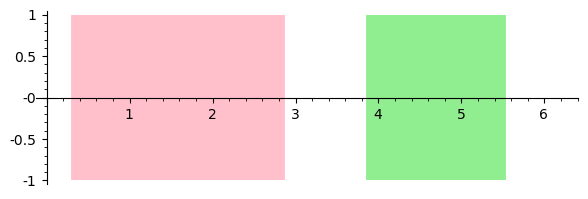

In [13]:
sig.plot()

In [14]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=1)
csig

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 3.814697265625e-06 sec
mask = None
calling reach with y0 = [('None', '[-4.5264988148012977 .. 4.5309838285159448]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5294495737230332 .. 4.5304673567368976]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.526498814801298..4.530983828515945]
C = [1.0..5.0]
S = [-4.529449573723033..4.530467356736898]
contexts = ['[1.0..5.0]']
statics  = ['[-4.526498814801298..4.530983828515945]', '[-4.529449573723033..4.530467356736898]']
assigning system with dimension 2
resulting system has dimensi

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.072690282093633054 .. 0.35711531207374004]]
domain = [0.0000000000000000 .. 0.393699081

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071167d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 

calling reach with y0 = [('None', '[-0.71149175796943321 .. 2.1433076359737502]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5239759288846316 .. -2.7971767083140171]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.7114917579694332..2.14330763597375]
C = [1.0..5.0]
S = [-4.5239759288846315..-2.797176708314017]
contexts = ['[1.0..5.0]']
statics  = ['[-0.7114917579694332..2.14330763597375]', '[-4.5239759288846315..-2.797176708314017]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.6689300537109375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'((

calling reach with y0 = [('None', '[-0.36412326839893028 .. 1.4103571756260336]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5135482659224247 .. -3.0230296118860695]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.3641232683989303..1.4103571756260336]
C = [1.0..5.0]
S = [-4.513548265922425..-3.0230296118860696]
contexts = ['[1.0..5.0]']
statics  = ['[-0.3641232683989303..1.4103571756260336]', '[-4.513548265922425..-3.0230296118860696]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(

PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071167d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.27293914034212557 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27293914034212557 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[1.3628062100078315 .. 3.3664617513882665]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9038247674745961 .. -2.0242330353977102]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.3628062100078315..3.3664617513882664]
C = [1.0..5.0]
S = [-3.903824767474596..-2.0242330353977103]
contexts = ['[1.0..5.0]']
statics  = ['[1.3628062100078315..3.3664617513882664]', '[-3.903824767474596..-2.0242330353977103]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.0994415283203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'((

top-level root detection: 1 items in 0.01 seconds
roots = [[0.15150538257213314 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15150538257213314 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15150538257213314 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03800153732299805 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

top-level root detection: 1 items in 0.01 seconds
roots = [[0.15169436331998537 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15169436331998537 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15169436331998537 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04400491714477539 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.022693157196044922 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071168c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_

top-level root detection: 1 items in 0.01 seconds
roots = [[0.15274275975073073 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15274275975073073 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15274275975073073 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.02627277374267578 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

ContextSignal([0.0000000000000000 .. 6.2841853071795866], <...>, children=[[-1 .. 1], [-1 .. 1]])

mask = None
calling reach with y0 = [('None', '[-3.8419428002980043 .. 3.8404682251920748]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8390067818681782 .. 3.8416024333021138]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.8419428002980043..3.8404682251920748]
C = [1.0..5.0]
S = [-3.839006781868178..3.8416024333021137]
contexts = ['[1.0..5.0]']
statics  = ['[-3.8419428002980043..3.8404682251920748]', '[-3.839006781868178..3.8416024333021137]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y'

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given boo

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.1

calling reach with y0 = [('None', '[-1.5197992501013458 .. 3.5540730208345260]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8390067818681782 .. -0.98415663403143860]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.5197992501013458..3.554073020834526]
C = [1.0..5.0]
S = [-3.839006781868178..-0.9841566340314386]
contexts = ['[1.0..5.0]']
statics  = ['[-1.5197992501013458..3.554073020834526]', '[-3.839006781868178..-0.9841566340314386]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.0994415283203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[-1.5197992501013458 .. -0.64863491020317609]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.6348600010769801 .. -2.9749559195359571]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.5197992501013458..-0.6486349102031761]
C = [1.0..5.0]
S = [-3.63486000107698..-2.974955919535957]
contexts = ['[1.0..5.0]']
statics  = ['[-1.5197992501013458..-0.6486349102031761]', '[-3.63486000107698..-2.974955919535957]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 f

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given boo

signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[-0.56796373454261884 .. 0.42407622900064463]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8296786401386914 .. -3.1442314789571828]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.5679637345426188..0.4240762290006446]
C = [1.0..5.0]
S = [-3.8296786401386913..-3.144231478957183]
contexts = ['[1.0..5.0]']
statics  = ['[-0.5679637345426188..0.4240762290006446]', '[-3.8296786401386913..-3.144231478957183]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.28635803744145826 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28635803744145826 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28635803744145826 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seco

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd0714e320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[0.95284798900346434 .. 3.8404682251920748]'), 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.16590929538299564 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.16590929538299564 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.016244888305664062 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_mask

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd0702f230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.22401214074235956 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.22401214074235956 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03379011154174805 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd0702f050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

calling reach with y0 = [('None', '[-4.3027500770438483 .. -0.97671767122056918]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0250452750116069 .. 1.5358815155497457]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.302750077043848..-0.9767176712205692]
C = [1.0..5.0]
S = [-4.025045275011607..1.5358815155497456]
contexts = ['[1.0..5.0]']
statics  = ['[-4.302750077043848..-0.9767176712205692]', '[-4.025045275011607..1.5358815155497456]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.6226043701171875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071165f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071165f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.15140291258681604 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15140291258681604 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.15221683870988211 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15221683870988211 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domai

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04026675224304199 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03680157661437988 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.15666774049850268 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15666774049850268 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[2.2169551905839801 .. 3.9223403553826431]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.3823754345499168 .. 3.3688147768660138]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.21695519058398..3.922340355382643]
C = [1.0..5.0]
S = [1.3823754345499168..3.3688147768660137]
contexts = ['[1.0..5.0]']
statics  = ['[2.21695519058398..3.922340355382643]', '[1.3823754345499168..3.3688147768660137]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00000000

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071165f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.35419959579501514 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35419959579501514 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.21722482457977232 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.21722482457977232 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.21722482457977232 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.02230381965637207 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

roots = [[0.15843665709029583 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15843665709029583 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[1.2901301476035369 .. 2.2926373662085032]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0956493094163164 .. 3.9404055676319119]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.290130147603537..2.292637366208503]
C = [1.0..5.0]
S = [3.0956493094163164..3.940405567631912]
contexts = ['[1.0..5.0]']
statics  = ['[1.290130147603537..2.292637366208503]', '[3.0956493094163164..3.940405567631912]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <fl

calling reach with y0 = [('None', '[-4.0718501013884448 .. 4.0680764873518581]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0702908940696814 .. 4.0699368597354538]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.071850101388445..4.068076487351858]
C = [1.0..5.0]
S = [-4.070290894069681..4.069936859735454]
contexts = ['[1.0..5.0]']
statics  = ['[-4.071850101388445..4.068076487351858]', '[-4.070290894069681..4.069936859735454]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 5.7220458984375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00000

calling reach with y0 = [('None', '[-1.4466307252110140 .. 2.0000000000000005]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.9999999999999995 .. 4.0699368597354538]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.446630725211014..2.0000000000000004]
C = [1.0..5.0]
S = [2.9999999999999996..4.069936859735454]
contexts = ['[1.0..5.0]']
statics  = ['[-1.446630725211014..2.0000000000000004]', '[2.9999999999999996..4.069936859735454]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.13537630871851455 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.13537630871851455 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.13537630871851455 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds

calling reach with y0 = [('None', '[0.78034595125675476 .. 1.6987680066308184]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1297871380090249 .. 3.8451139175137206]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.7803459512567548..1.6987680066308184]
C = [1.0..5.0]
S = [3.129787138009025..3.8451139175137206]
contexts = ['[1.0..5.0]']
statics  = ['[0.7803459512567548..1.6987680066308184]', '[3.129787138009025..3.8451139175137206]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.0531158447265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd0702f6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0

Computed 4 flowpipes in 4.0531158447265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd0702f7d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[-2.0197991356356089 .. -1.1462015646277550]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.6841542514829242 .. -2.9752024100976997]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.019799135635609..-1.146201564627755]
C = [1.0..5.0]
S = [-3.684154251482924..-2.9752024100976997]
contexts = ['[1.0..5.0]']
statics  = ['[-2.019799135635609..-1.146201564627755]', '[-3.684154251482924..-2.9752024100976997]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.50

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.06242251396179199 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

Computed 4 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.28619008258975403 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28619008258975403 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28619008258975403 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
re

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

top-level root detection: 1 items in 0.01 seconds
roots = [[0.26084863181957640 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26084863181957640 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.26084863181957640 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04767441749572754 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, m

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.058263540267944336 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unprecondition

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.28258340869541281 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28258340869541281 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.054863996360120972 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.054863996360120972 .. 0.39469908169772422]]
seg_domain = [0.000000000000000

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071167d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[-0.51285101433804237 .. 0.98625511415568413]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5052879186563040 .. -3.7344703987533631]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.5128510143380424..0.9862551141556841]
C = [1.0..5.0]
S = [-4.505287918656304..-3.734470398753363]
contexts = ['[1.0..5.0]']
statics  = ['[-0.5128510143380424..0.9862551141556841]', '[-4.505287918656304..-3.734470398753363]']
assigning system with dimension 2
resulting system has dimension 2
run 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.1

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.37133762754302868 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37133762754302868 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seco

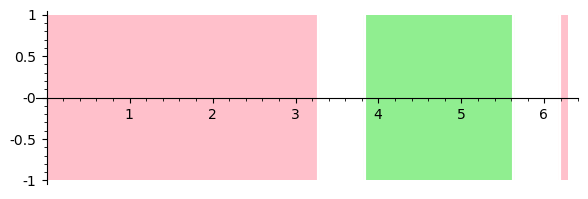

In [15]:
csig.refined_signal(1).plot()

In [16]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=2)
csig

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 5.7220458984375e-06 sec
mask = None
calling reach with y0 = [('None', '[-4.5264988148012977 .. 4.5309838285159448]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5294495737230332 .. 4.5304673567368976]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.526498814801298..4.530983828515945]
C = [1.0..5.0]
S = [-4.529449573723033..4.530467356736898]
contexts = ['[1.0..5.0]']
statics  = ['[-4.526498814801298..4.530983828515945]', '[-4.529449573723033..4.530467356736898]']
assigning system with dimension 2
resulting system has dimens

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03989100456237793 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.37358267476395230]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.37358267476395230]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.37358267476395230]]
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[-4.0810819277238242 .. -0.64593252071168028]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[0.92550975103298271 .. 4.3028277880957067]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.081081927723824..-0.6459325207116803]
C = [1.0..5.0]
S = [0.9255097510329827..4.302827788095707]
contexts = ['[1.0..5.0]']
statics  = ['[-4.081081927723824..-0.6459325207116803]', '[0.9255097510329827..4.302827788095707]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integratio

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.29957137599993721 .. 0.39469908169772422]]
doma

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

calling reach with y0 = [('None', '[-2.0410474131061314 .. -0.19128053142365172]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3231869034726219 .. -2.9530776612656359]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.0410474131061314..-0.19128053142365173]
C = [1.0..5.0]
S = [-4.323186903472622..-2.953077661265636]
contexts = ['[1.0..5.0]']
statics  = ['[-2.0410474131061314..-0.19128053142365173]', '[-4.323186903472622..-2.953077661265636]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domai

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domai

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

calling reach with y0 = [('None', '[-0.012888164561308657 .. 1.7855704381115745]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4580125119608312 .. -2.9247376046708528]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.012888164561308656..1.7855704381115745]
C = [1.0..5.0]
S = [-4.458012511960831..-2.924737604670853]
contexts = ['[1.0..5.0]']
statics  = ['[-0.012888164561308656..1.7855704381115745]', '[-4.458012511960831..-2.924737604670853]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.76837158203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res =

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
calling reach with y0 = [('None', '[0.33881391321577813 .. 2.1433076359737502]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3788565180608839 .. -2.7971902116765079]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.33881391321577814..2.14330763597375]
C = [1.0..5.0]
S = [-4.378856518060884..-2.797190211676508]
contexts = ['[1.0..5.0]'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.04967308044433594 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116230>, (([

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.16841946976202365 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.16841946976202365 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.16841946976202365 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071167d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.28317097259292728 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28317097259292728 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.35470835534305061 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35470835534305061 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35470835534305061 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071165f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0

top-level root detection: 1 items in 0.00 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
re

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.30984834716580245 .. 0.39469908169772422]]
doma

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.0547792911529541 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, ma

top-level root detection: 1 items in 0.01 seconds
roots = [[0.25267829913211320 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25267829913211320 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25267829913211320 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.025246620178222656 sec
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071165f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.24475236661922883 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.24475236661922883 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.18490718625743751 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18490718625743751 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19366803074428717 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19366803074428717 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19366803074428717 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
re

ContextSignal([0.0000000000000000 .. 6.2841853071795866], <...>, children=[[-1 .. 1], [-1 .. 1]])

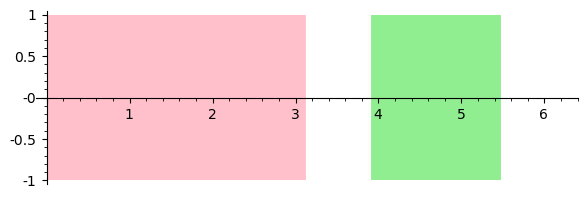

In [17]:
csig.refined_signal(0).plot()

In [18]:
csig = prop.context_signal_for_system(system.with_y0([RIF(1, 2), RIF(3, 4)]),
                             2*sage.pi,
                             epsilon_ctx=0.1,
                             refine=0)
csig

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 8.106231689453125e-06 sec
mask = None
calling reach with y0 = [('None', '[-4.5264988148012977 .. 4.5309838285159448]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5294495737230332 .. 4.5304673567368976]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.526498814801298..4.530983828515945]
C = [1.0..5.0]
S = [-4.529449573723033..4.530467356736898]
contexts = ['[1.0..5.0]']
statics  = ['[-4.526498814801298..4.530983828515945]', '[-4.529449573723033..4.530467356736898]']
assigning system with dimension 2
resulting system has dime

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05809807777404785 sec
calling reach with y0 = [('None', '[-0.64045037170795416 .. 2.0000000000000005]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.9999999999999995 .. 4.5073846520152250]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.6404503717079542..2.0000000000000004]
C = [1.0..5.0]
S = [2.9999999999999996..4.507384652015225]
contexts = ['[1.0..5.0]']
statics  = ['[-0.6404503717079542..2.0000000000000004]', '[2.9999999999999996..4.507384652015225]']
assigning system with dimen

calling reach with y0 = [('None', '[-0.22903193893053623 .. 1.3910749387049915]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1218554712042760 .. 4.4466119078744129]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.22903193893053622..1.3910749387049914]
C = [1.0..5.0]
S = [3.121855471204276..4.446611907874413]
contexts = ['[1.0..5.0]']
statics  = ['[-0.22903193893053622..1.3910749387049914]', '[3.121855471204276..4.446611907874413]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fc1320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

Computed 4 flowpipes in 7.152557373046875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb410>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb410>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.024548768997192383 sec
calling reach with y0 = [('None', '[-2.0410474131061314 .. 4.1062106991798526]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5294495737230332 .. -0.93170747502332862]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.0410474131061314..4.106210699179853]
C = [1.0..5.0]
S = [-4.529449573723033..-0.9317074750233286]
contexts = ['[1.0..5.0]']
statics  = ['[-2.0410474131061314..4.106210699179853]', '[-4.529449573723033..-0.9317074750233286]']
assigning system with 

calling reach with y0 = [('None', '[-2.0410474131061314 .. -0.59775992632439667]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.1833016393803391 .. -2.9530776612656359]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.0410474131061314..-0.5977599263243967]
C = [1.0..5.0]
S = [-4.183301639380339..-2.953077661265636]
contexts = ['[1.0..5.0]']
statics  = ['[-2.0410474131061314..-0.5977599263243967]', '[-4.183301639380339..-2.953077661265636]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.0531158447265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res =

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb5f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

calling reach with y0 = [('None', '[0.90898800582668781 .. 4.3110000823151653]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[0.64047038364304753 .. 4.0988470183285611]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.9089880058266878..4.311000082315165]
C = [1.0..5.0]
S = [0.6404703836430475..4.098847018328561]
contexts = ['[1.0..5.0]']
statics  = ['[0.9089880058266878..4.311000082315165]', '[0.6404703836430475..4.098847018328561]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00000

top-level root detection: 1 items in 0.01 seconds
roots = [[0.28381772396443522 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28381772396443522 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28381772396443522 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.021623611450195312 sec
calling reach with y0 = [('None', '[2.2099901294185877 .. 3.9633878797355080]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.3054846818778016 .. 3.1491806899234161]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.2099901294185877..3.963387879735508]
C = [1.0..5.0]
S = [1.3054846818778016..3.149180689923416]
contexts = ['[1.0..5.0]']
statics  = ['[2.2099901294185877..3.963387879735508]', '[1.3054846818778016..3.14918068

calling reach with y0 = [('None', '[1.4740106306205120 .. 3.1603570063277183]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.2028697241195169 .. 3.8280159946212638]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.474010630620512..3.160357006327718]
C = [1.0..5.0]
S = [2.202869724119517..3.8280159946212637]
contexts = ['[1.0..5.0]']
statics  = ['[1.474010630620512..3.160357006327718]', '[2.202869724119517..3.8280159946212637]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000

ContextSignal([0.0000000000000000 .. 6.2841853071795866], <...>, children=[[-1 .. 1], [-1 .. 1]])

mask = None
calling reach with y0 = [('None', '[-3.8419428002980043 .. 3.8404682251920748]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8390067818681782 .. 3.8416024333021138]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.8419428002980043..3.8404682251920748]
C = [1.0..5.0]
S = [-3.839006781868178..3.8416024333021137]
contexts = ['[1.0..5.0]']
statics  = ['[-3.8419428002980043..3.8404682251920748]', '[-3.839006781868178..3.8416024333021137]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.33550623292693144]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.33550623292693144]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.33550623292693144]]
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.06490850448608398 sec
calling reach with y0 = [('None', '[-1.8015040515886827 .. 0.25412931487231244]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.7979977626605339 .. 3.8291746388809825]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.8015040515886827..0.25412931487231244]
C = [1.0..5.0]
S = [2.797997762660534..3.8291746388809824]
contexts = ['[1.0..5.0]']
statics  = ['[-1.8015040515886827..0.25412931487231244]', '[2.797997762660534..3.8291746388809824]']
assigning system with dimension 2
resulting syst

calling reach with y0 = [('None', '[-3.5550296556115826 .. -2.0477287496457790]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-2.8775617651727550 .. -1.0396878486610077]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.5550296556115826..-2.047728749645779]
C = [1.0..5.0]
S = [-2.877561765172755..-1.0396878486610077]
contexts = ['[1.0..5.0]']
statics  = ['[-3.5550296556115826..-2.047728749645779]', '[-2.877561765172755..-1.0396878486610077]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.2

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb7d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb7d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

calling reach with y0 = [('None', '[-0.88770779810303635 .. 0.42407622900064463]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8354627253738949 .. -3.1297687406716474]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.8877077981030363..0.4240762290006446]
C = [1.0..5.0]
S = [-3.835462725373895..-3.1297687406716475]
contexts = ['[1.0..5.0]']
statics  = ['[-0.8877077981030363..0.4240762290006446]', '[-3.835462725373895..-3.1297687406716475]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcbb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

S = [-3.83352200015853..-3.0408679098544185]
contexts = ['[1.0..5.0]']
statics  = ['[-0.24291968913906972..1.1238671233726005]', '[-3.83352200015853..-3.0408679098544185]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b

Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

calling reach with y0 = [('None', '[2.7922607484686858 .. 3.8404682251920748]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-1.5039960804197979 .. 1.8094399215199320]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.792260748468686..3.8404682251920748]
C = [1.0..5.0]
S = [-1.5039960804197978..1.809439921519932]
contexts = ['[1.0..5.0]']
statics  = ['[2.792260748468686..3.8404682251920748]', '[-1.5039960804197978..1.809439921519932]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb7d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0

calling reach with y0 = [('None', '[2.6368288198832159 .. 3.5690957295481268]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.0285354179572112 .. 2.1169253874367847]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.636828819883216..3.5690957295481267]
C = [1.0..5.0]
S = [1.0285354179572113..2.1169253874367846]
contexts = ['[1.0..5.0]']
statics  = ['[2.636828819883216..3.5690957295481267]', '[1.0285354179572113..2.1169253874367846]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.76837158203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb5f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000

calling reach with y0 = [('None', '[2.0261036683075466 .. 3.0125595939579877]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.8984201009948544 .. 2.9048171873410889]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.0261036683075466..3.0125595939579877]
C = [1.0..5.0]
S = [1.8984201009948545..2.904817187341089]
contexts = ['[1.0..5.0]']
statics  = ['[2.0261036683075466..3.0125595939579877]', '[1.8984201009948545..2.904817187341089]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.000000

calling reach with y0 = [('None', '[1.5185534623230667 .. 2.4928628866515439]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.3919837447922591 .. 3.2935102361518296]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.5185534623230668..2.492862886651544]
C = [1.0..5.0]
S = [2.391983744792259..3.2935102361518296]
contexts = ['[1.0..5.0]']
statics  = ['[1.5185534623230668..2.492862886651544]', '[2.391983744792259..3.2935102361518296]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00000

calling reach with y0 = [('None', '[-3.5025777441746291 .. 3.5058485032941134]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5057079469078816 .. 3.5050048471272382]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.502577744174629..3.5058485032941133]
C = [1.0..5.0]
S = [-3.5057079469078816..3.505004847127238]
contexts = ['[1.0..5.0]']
statics  = ['[-3.502577744174629..3.5058485032941133]', '[-3.5057079469078816..3.505004847127238]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.13755277787104562]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.13755277787104562]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.13755277787104562]]
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.025689125061035156 sec
calling reach with y0 = [('None', '[-3.2760402079151927 .. -1.2217826264181819]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[0.98068301263546020 .. 3.1969119397986852]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.2760402079151927..-1.221782626418182]
C = [1.0..5.0]
S = [0.9806830126354602..3.196911939798685]
contexts = ['[1.0..5.0]']
statics  = ['[-3.2760402079151927..-1.221782626418182]', '[0.9806830126354602..3.196911939798685]']
assigning system with dimension 2
resulting syst

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.050215721130371094 sec
calling reach with y0 = [('None', '[-1.2591751685990221 .. 3.5058485032941134]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5057079469078816 .. 3.2832736134708305]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.259175168599022..3.5058485032941133]
C = [1.0.

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcbb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd85f0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd85f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.1

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcbb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.056745052337646484 sec
calling reach with y0 = [('None', '[-1.7877301679563940 .. 1.2500000000000003]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.9897973025319082 .. 3.7365104756599564]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.787730167956394..1.2500000000000002]
C = [1.0..5.0]
S = [2.9897973025319082..3.7365104756599563]
contexts = ['[1.0.

contexts = ['[1.0..5.0]']
statics  = ['[0.2936423771058914..0.9266277142126924]', '[3.3308156431674445..3.695908882855267]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.1

top-level root detection: 1 items in 0.02 seconds
roots = [[0.17983082853453105 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17983082853453105 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17983082853453105 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.06279659271240234 sec
calling reach with y0 = [('None', '[-2.5046508918059165 .. -1.6019670132252592]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.2528624955300654 .. -2.5101644768211492]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.5046508918059165..-1.6019670132252593]
C = [1.0..5.0]
S = [-3.2528624955300653..-2.5101644768211493]
contexts = ['[1.0..5.0]']
statics  = ['[-2.5046508918059165..-1.6019670132252593]', '[-3.252862495530065

top-level root detection: 1 items in 0.02 seconds
roots = [[0.18383709530879299 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18383709530879299 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18383709530879299 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05623793601989746 sec
calling reach with y0 = [('None', '[-1.2590544449332127 .. 3.7384880173232076]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.7410189675020518 .. 3.5341578644515033]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.2590544449332126..3.7384880173232076]
C = [1.0..5.0]
S = [-3.7410189675020518..3.5341578644515033]
contexts = ['[1.0..5.0]']
statics  = ['[-1.2590544449332126..3.7384880173232076]', '[-3.7410189675020518..3.

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd78c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd78c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.0

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd75f0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.34869797696534088 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.34869797696534088 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.28557838670805124 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.28557838670805124 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root d

_handle_initials called!
vars = [x, y]
S = [-0.09775064208573525..1.5000000000000002]
C = [1.0..5.0]
S = [2.9999999999999996..3.5988129199474503]
contexts = ['[1.0..5.0]']
statics  = ['[-0.09775064208573525..1.5000000000000002]', '[2.9999999999999996..3.5988129199474503]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, (([-1.0000000000 , -1.0000000000] * y

top-level root detection: 1 items in 0.01 seconds
roots = [[0.043045264122807097 .. 0.32909987899240146]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.043045264122807097 .. 0.32909987899240146]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.043045264122807097 .. 0.32909987899240146]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.05160164833068848 sec
calling reach with y0 = [('None', '[-1.4328861521190395 .. 0.24582738759395165]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.9898782761294340 .. 3.5989093903802619]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.4328861521190395..0.24582738759395165]
C = [1.0..5.0]
S = [2.989878276129434..3.598909390380262]
contexts = ['[1.0..5.0]']
statics  = ['[-1.4328861521190395..0.24582738759395165]', '[2.989878276129434..3.598909390380262]']
assi

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071169b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd78c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd78c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.029140233993530273 sec
calling reach with y0 = [('None', '[-0.56534828204597665 .. 0.094106379826456186]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5878541407956033 .. -3.2271767775826956]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.5653482820459766..0.09410637982645619]
C = [1.0..5.0]
S = [-3.5878541407956033..-3.2271767775826956]
contexts = ['[1.0..5.0]']
statics  = ['[-0.5653482820459766..0.09410637982645619]', '[-3.5878541407956033..-3.2271767775826956]']
assigning syst

calling reach with y0 = [('None', '[0.088880285745372891 .. 0.77276047355337274]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5770628962598355 .. -3.1841903418197241]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.08888028574537289..0.7727604735533727]
C = [1.0..5.0]
S = [-3.5770628962598354..-3.184190341819724]
contexts = ['[1.0..5.0]']
statics  = ['[0.08888028574537289..0.7727604735533727]', '[-3.5770628962598354..-3.184190341819724]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 5.245208740234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

calling reach with y0 = [('None', '[2.9865899399532032 .. 3.6013432112969178]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-1.5008766087272425 .. 1.4385149304000478]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.986589939953203..3.6013432112969177]
C = [1.0..5.0]
S = [-1.5008766087272425..1.4385149304000477]
contexts = ['[1.0..5.0]']
statics  = ['[2.986589939953203..3.6013432112969177]', '[-1.5008766087272425..1.4385149304000477]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.6226043701171875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb140>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.3

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.27879823997641334 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27879823997641334 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seco

Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb410>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb410>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

calling reach with y0 = [('None', '[-1.6102935047675596 .. 0.15014453418512797]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.1666156621301793 .. 3.8194391803232662]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.6102935047675595..0.15014453418512796]
C = [1.0..5.0]
S = [3.1666156621301793..3.819439180323266]
contexts = ['[1.0..5.0]']
statics  = ['[-1.6102935047675595..0.15014453418512796]', '[3.1666156621301793..3.819439180323266]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.

run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

integrationScheme = 2
Computed 4 flowpipes in 5.7220458984375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbos

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.18398041854800023 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18398041854800023 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18398041854800023 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.0788419246673584 sec
calling reach with y0 = [('None', '[-0.14359931732337436 .. 0.91184211544496796]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8241779950443662 .. -3.3919745596737072]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.14359931732337436..0.911842115444968]
C = [1.

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.19510702044601477 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19510702044601477 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19510702044601477 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05819058418273926 sec
calling reach with y0 = [('None', '[3.1631857395888847 .. 3.8333766705554844]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-1.5006897336635261 .. 1.6162487996307918]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [3.1631857395888847..3.8333766705554844]
C = [1.0..5.0]
S = [-1.5006897336635

top-level root detection: 1 items in 0.01 seconds
roots = [[0.35512123758629582 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35512123758629582 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35512123758629582 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04744553565979004 sec
calling reach with y0 = [('None', '[2.6110974270513520 .. 3.2098715467102120]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.8511429806739752 .. 2.5295702620938352]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.611097427051352..3.209871546710212]
C = [1.0..5.0]
S = [1.8511429806739752..2.529570262093835]
contexts = ['[1.0..5.0]']
statics  = ['[2.611097427051352..3.209871546710212]', '[1.8511429806739752..2.52957026209

top-level root detection: 1 items in 0.01 seconds
roots = [[0.27690985285187180 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27690985285187180 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.27690985285187180 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.048616647720336914 sec
calling reach with y0 = [('None', '[1.2245045906885134 .. 2.1732792936109183]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8729841144340615 .. 3.5343590643856980]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.2245045906885135..2.173279293610918]
C = [1.0..5.0]
S = [2.8729841144340615..3.534359064385698]
contexts = ['[1.0..5.0]']
statics  = ['[1.2245045906885135..2.173279293610918]', '[2.8729841144340615..3.53435906

Computed 4 flowpipes in 5.7220458984375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root 

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.074340194104038248 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.074340194104038248 .. 0.39469908169772422]]
seg_domain = [0.000000000000000

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd79b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd79b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.3

calling reach with y0 = [('None', '[-1.5195578027697945 .. 4.3057472532506643]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3060847665623268 .. 4.0568999170514229]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.5195578027697945..4.305747253250664]
C = [1.0..5.0]
S = [-4.306084766562327..4.056899917051423]
contexts = ['[1.0..5.0]']
statics  = ['[-1.5195578027697945..4.305747253250664]', '[-4.306084766562327..4.056899917051423]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcbc80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcbc80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_

Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.35407984577594614 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35407984577594614 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.35407984577594614 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seco

top-level root detection: 1 items in 0.01 seconds
roots = [[0.15838791869787510 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15838791869787510 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.15838791869787510 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03771162033081055 sec
calling reach with y0 = [('None', '[1.2901301476035369 .. 2.2926373662085032]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0956493094163164 .. 3.9404055676319119]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.290130147603537..2.292637366208503]
C = [1.0..5.0]
S = [3.0956493094163164..3.940405567631912]
contexts = ['[1.0..5.0]']
statics  = ['[1.290130147603537..2.292637366208503]', '[3.0956493094163164..3.94040556763

Computed 4 flowpipes in 5.4836273193359375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

calling reach with y0 = [('None', '[-2.6002254165590229 .. -0.98746222509009617]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.7643098648958504 .. -2.7408872492074820]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.600225416559023..-0.9874622250900962]
C = [1.0..5.0]
S = [-3.7643098648958504..-2.740887249207482]
contexts = ['[1.0..5.0]']
statics  = ['[-2.600225416559023..-0.9874622250900962]', '[-3.7643098648958504..-2.740887249207482]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

calling reach with y0 = [('None', '[-1.2589337212674372 .. 3.9748650065053233]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9763299880962673 .. 3.7850421154321783]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.2589337212674372..3.9748650065053233]
C = [1.0..5.0]
S = [-3.9763299880962673..3.7850421154321783]
contexts = ['[1.0..5.0]']
statics  = ['[-1.2589337212674372..3.9748650065053233]', '[-3.9763299880962673..3.7850421154321783]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(

Computed 4 flowpipes in 6.198883056640625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb140>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

integrationScheme = 2
Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, ver

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.1

calling reach with y0 = [('None', '[2.2386051537537281 .. 3.1405850882817946]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.1977581205011813 .. 3.1165766087973568]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.238605153753728..3.1405850882817945]
C = [1.0..5.0]
S = [2.1977581205011814..3.1165766087973568]
contexts = ['[1.0..5.0]']
statics  = ['[2.238605153753728..3.1405850882817945]', '[2.1977581205011814..3.1165766087973568]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.000

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.76837158203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_un

signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.08834481239318848 sec
mask = None
calling reach with y0 = [('None', '[-4.2159233102312995 .. 4.2158153504259435]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2116410086904877 .. 4.2166102980408260]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.215923310231299..4.2158153504259435]
C = [1.0..5.0]
S = [-4.211641008690488..4.216610298040826]
contexts = ['[1.0..5.0]']
statics  = ['[-4.215923310231299..4.2158153504259435]', '[-4.211641008690488..4.216610298040826]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 5.7220458984375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 ,

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

top-level root detection: 1 items in 0.01 seconds
roots = [[0.38972128640576653 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38972128640576653 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.38972128640576653 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.043672800064086914 sec
calling reach with y0 = [('None', '[-2.0161015183372646 .. -0.98733411922298086]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0145312125691480 .. -3.4189352729900597]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.0161015183372646..-0.9873341192229809]
C = [1.0..5.0]
S = [-4.014531212569148..-3.4189352729900597]
contexts = ['[1.0..5.0]']
statics  = ['[-2.0161015183372646..-0.9873341192229809]', '[-4.01453121256914

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.10059428215026855 sec
calling reach with y0 = [('None', '[-1.2588129976016629 .. 4.0316838739073351]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2116410086904877 .. -0.99387946699609508]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.2588129976016629..4.031683873907335]
C = [1.0..5.0]
S = [-4.211641008690488..-0.9938794669960951]
contexts = ['[1.0..5.0]']
statics  = ['[-1.2588129976016629..4.031683873907335]', '[-4.211641008690488..-0.9938794669960951]']
assigning system with d

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04882168769836426 sec
calling reach with y0 = [('None', '[-0.49410412697341799 .. 0.61251700180383107]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2116410086904877 .. -3.8436885777036171]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.494104126973418..0.6125170018038311]
C = [1.0..5.0]
S = [-4.211641008690488..-3.843688577703617]
contexts = ['[1.0..5.0]']
statics  = ['[-0.494104126973418..0.6125170018038311]', '[-4.211641008690488..-3.843688577703617]']
assigning system with di

domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.039434194564819336 sec
calling reach with y0 = [('None', '[1.7629090278770589 .. 4.0316838739073351]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.7159979803948394 .. -0.99387946699609508]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.762909027877059..4.031683873907335]
C = [1.0..5.0]
S = [-3.7159979803948393..-0.9938794669960951]
contexts = ['[1.0..5.0]']
statics  = ['[1.762909027877059..4.031683873907335]', '[-3.7159979803948393..-0.9938794669960951]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0

fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7410>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.00000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd071167d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.2

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.36946558727368755 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.36946558727368755 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

Computed 4 flowpipes in 5.245208740234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7140>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

statics  = ['[-0.04790993855853514..1.0509237573366244]', '[-4.049120024345385..-3.5997587775276885]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.4543533325195312e-05 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = 

calling reach with y0 = [('None', '[3.3397815392245373 .. 4.0660161845847798]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-1.5005028585999614 .. 1.7939826688618510]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [3.3397815392245374..4.06601618458478]
C = [1.0..5.0]
S = [-1.5005028585999614..1.793982668861851]
contexts = ['[1.0..5.0]']
statics  = ['[3.3397815392245374..4.06601618458478]', '[-1.5005028585999614..1.793982668861851]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 5.245208740234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000

Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

calling reach with y0 = [('None', '[1.8830911729789832 .. 2.5431116209964980]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.8926215502926684 .. 3.4698324189333208]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.8830911729789832..2.543111620996498]
C = [1.0..5.0]
S = [2.8926215502926684..3.4698324189333207]
contexts = ['[1.0..5.0]']
statics  = ['[1.8830911729789832..2.543111620996498]', '[2.8926215502926684..3.4698324189333207]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.6226043701171875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.028720617294311523 sec
calling reach with y0 = [('None', '[-4.2970700246765210 .. 1.5000000000000003]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0146501094032674 .. 4.2971066623653176]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.297070024676521..1.5000000000000002]
C = [1.0..5.0]
S = [-4.014650109403267..4.297106662365318]
contexts = ['[1.0..5.0]']
statics  = ['[-4.297070024676521..1.5000000000000002]', '[-4.014650109403267..4.297106662365318]']
assigning system with dimens

calling reach with y0 = [('None', '[0.44119804842124982 .. 1.5000000000000003]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.7499999999999995 .. 4.2375331299181563]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.4411980484212498..1.5000000000000002]
C = [1.0..5.0]
S = [3.7499999999999996..4.237533129918156]
contexts = ['[1.0..5.0]']
statics  = ['[0.4411980484212498..1.5000000000000002]', '[3.7499999999999996..4.237533129918156]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.0531158447265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.6226043701171875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[-1.5088129403687592 .. -0.44163796339430128]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2207664172204150 .. -3.7351035931270937]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.5088129403687591..-0.4416379633943013]
C = [1.0..5.0]
S = [-4.220766417220415..-3.7351035931270937]
contexts = ['[1.0..5.0]']
statics  = ['[-1.5088129403687591..-0.4416379633943013]', '[-4.220766417220415..-3.7351035931270937]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.76837158203125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res =

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05041170120239258 sec
calling reach with y0 = [('None', '[-0.34725250513861361 .. 0.38151361025094339]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2924626553274071 .. -3.9394903580293121]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.3472525051386136..0.3815136102509434]
C = [1.0..5.0]
S = [-4.292462655327407..-3.939490358029312]
contexts = ['[1.0..5.0]']
statics  = ['[-0.3472525051386136..0.3815136102509434]', '[-4.292462655327407..-3.939490358029312]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_n

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd79b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd79b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.3

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfe60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

calling reach with y0 = [('None', '[-4.0718501013884448 .. -2.9601054045180781]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-1.4364346188251654 .. 2.0359939805664898]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.071850101388445..-2.960105404518078]
C = [1.0..5.0]
S = [-1.4364346188251653..2.0359939805664897]
contexts = ['[1.0..5.0]']
statics  = ['[-4.071850101388445..-2.960105404518078]', '[-1.4364346188251653..2.0359939805664897]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-

calling reach with y0 = [('None', '[-2.6658458214852066 .. -1.4769740135131159]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5248403733332517 .. -2.5266052726552485]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.6658458214852065..-1.476974013513116]
C = [1.0..5.0]
S = [-3.5248403733332516..-2.5266052726552486]
contexts = ['[1.0..5.0]']
statics  = ['[-2.6658458214852065..-1.476974013513116]', '[-3.5248403733332516..-2.5266052726552486]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.0531158447265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7410>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb140>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

calling reach with y0 = [('None', '[1.7393126106265053 .. 2.6860447716571648]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.5084123378872473 .. 3.3921356133322230]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.7393126106265053..2.6860447716571647]
C = [1.0..5.0]
S = [2.5084123378872474..3.392135613332223]
contexts = ['[1.0..5.0]']
statics  = ['[1.7393126106265053..2.6860447716571647]', '[2.5084123378872474..3.392135613332223]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071169b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00

calling reach with y0 = [('None', '[0.13320270044293475 .. 1.7500000000000003]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.9999999999999995 .. 3.6948476025592352]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.13320270044293475..1.7500000000000002]
C = [1.0..5.0]
S = [2.9999999999999996..3.694847602559235]
contexts = ['[1.0..5.0]']
statics  = ['[0.13320270044293475..1.7500000000000002]', '[2.9999999999999996..3.694847602559235]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1

calling reach with y0 = [('None', '[-3.5451565663024188 .. -1.4877185673826416]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.2641049632175299 .. -0.87363436210014555]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.5451565663024187..-1.4877185673826416]
C = [1.0..5.0]
S = [-3.26410496321753..-0.8736343621001456]
contexts = ['[1.0..5.0]']
statics  = ['[-3.5451565663024187..-1.4877185673826416]', '[-3.26410496321753..-0.8736343621001456]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfe60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05681014060974121 sec
calling reach with y0 = [('None', '[-2.0698394924089150 .. -1.4877185673826416]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.2641049632175299 .. -2.8000421095066072]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.069839492408915..-1.4877185673826416]
C = [1.0..5.0]
S = [-3.26410496321753..-2.8000421095066073]
contexts = ['[1.0..5.0]']
statics  = ['[-2.069839492408915..-1.4877185673826416]', '[-3.26410496321753..-2.8000421095066073]']
assigning syste

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb7d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb7d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

Computed 4 flowpipes in 4.291534423828125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

calling reach with y0 = [('None', '[2.5099008620931693 .. 3.0945181845329955]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.8019050823969631 .. 2.4607566761779416]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.5099008620931693..3.0945181845329954]
C = [1.0..5.0]
S = [1.8019050823969631..2.4607566761779416]
contexts = ['[1.0..5.0]']
statics  = ['[2.5099008620931693..3.0945181845329954]', '[1.8019050823969631..2.4607566761779416]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.6689300537109375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7d70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.

Computed 4 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.18746061173765207 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18746061173765207 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[-3.7218709835702462 .. -2.6168763308900233]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-2.6750215370139557 .. -1.0502609202905277]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.721870983570246..-2.6168763308900234]
C = [1.0..5.0]
S = [-2.6750215370139556..-1.0502609202905278]
contexts = ['[1.0..5.0]']
statics  = ['[-3.721870983570246..-2.6168763308900234]', '[-2.6750215370139556..-1.0502609202905278]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

calling reach with y0 = [('None', '[-1.7590543304674405 .. 3.5228390324577053]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9413444252806378 .. -1.4942545170667436]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.7590543304674404..3.5228390324577052]
C = [1.0..5.0]
S = [-3.9413444252806378..-1.4942545170667436]
contexts = ['[1.0..5.0]']
statics  = ['[-1.7590543304674404..3.5228390324577052]', '[-3.9413444252806378..-1.4942545170667436]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

calling reach with y0 = [('None', '[-0.73184607401114055 .. -0.041006608544586167]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9106563854450931 .. -3.5387100658767409]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.7318460740111405..-0.04100660854458617]
C = [1.0..5.0]
S = [-3.910656385445093..-3.538710065876741]
contexts = ['[1.0..5.0]']
statics  = ['[-0.7318460740111405..-0.04100660854458617]', '[-3.910656385445093..-3.538710065876741]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd79b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res =

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7410>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool root

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unp

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7aa0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7aa0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03428959846496582 sec
calling reach with y0 = [('None', '[-2.0091749969003812 .. -1.0786934405095611]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5825770760409506 .. -2.9862647845137297]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.009174996900381..-1.0786934405095612]
C = [1.0..5.0]
S = [-3.5825770760409505..-2.98626478451373]
contexts = ['[1.0..5.0]']
statics  = ['[-2.009174996900381..-1.0786934405095612]', '[-3.5825770760409505..-2.98626478451373]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.5

calling reach with y0 = [('None', '[-0.70102253611056765 .. 0.35703722616828848]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8461012899861720 .. -3.4340519130894255]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.7010225361105676..0.3570372261682885]
C = [1.0..5.0]
S = [-3.846101289986172..-3.4340519130894256]
contexts = ['[1.0..5.0]']
statics  = ['[-0.7010225361105676..0.3570372261682885]', '[-3.846101289986172..-3.4340519130894256]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res =

calling reach with y0 = [('None', '[0.0011710313404017964 .. 0.71599531719456456]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8212622562417105 .. -3.4242286647889468]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.0011710313404017965..0.7159953171945646]
C = [1.0..5.0]
S = [-3.8212622562417105..-3.424228664788947]
contexts = ['[1.0..5.0]']
statics  = ['[0.0011710313404017965..0.7159953171945646]', '[-3.8212622562417105..-3.424228664788947]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
r

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7e60>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7e60>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

calling reach with y0 = [('None', '[1.7247822363291747 .. 3.1110727429945096]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.9865240851146324 .. 3.2838772132734158]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.7247822363291747..3.1110727429945095]
C = [1.0..5.0]
S = [1.9865240851146324..3.2838772132734158]
contexts = ['[1.0..5.0]']
statics  = ['[1.7247822363291747..3.1110727429945095]', '[1.9865240851146324..3.2838772132734158]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.6226043701171875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd071167d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.

top-level root detection: 1 items in 0.01 seconds
roots = [[0.29999999999999987 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.29999999999999987 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04259657859802246 sec
calling reach with y0 = [('None', '[1.7247822363291747 .. 2.3282060460965300]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.7677203030336041 .. 3.2838772132734158]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.7247822363291747..2.32820604609653]
C = [1.0..5.0]
S = [2.767720303033604..3.2838772132734158]
contexts = ['[1.0..5.0]']
statics  = ['[1.7247822363291747..2.32820604609653]', '[2.767720303033604..3.283877213273

top-level root detection: 1 items in 0.01 seconds
roots = [[0.17069921164447576 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17069921164447576 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.17069921164447576 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.05132699012756348 sec
calling reach with y0 = [('None', '[1.3966922622599606 .. 2.0000000000000005]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.2499999999999995 .. 3.6963807908493629]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.3966922622599607..2.0000000000000004]
C = [1.0..5.0]
S = [3.2499999999999996..3.696380790849363]
contexts = ['[1.0..5.0]']
statics  = ['[1.3966922622599607..2.0000000000000004]', '[3.2499999999999996..3.6963807

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfb90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

calling reach with y0 = [('None', '[-2.0090542732345718 .. 3.5196431758148537]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0592278829873072 .. -1.7442544476145898]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.0090542732345718..3.5196431758148536]
C = [1.0..5.0]
S = [-4.059227882987307..-1.7442544476145898]
contexts = ['[1.0..5.0]']
statics  = ['[-2.0090542732345718..3.5196431758148536]', '[-4.059227882987307..-1.7442544476145898]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.1

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04076123237609863 sec
calling reach with y0 = [('None', '[-0.23361603717975632 .. 0.49606682244479928]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0531374262935387 .. -3.6700086128646280]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.23361603717975632..0.49606682244479927]
C = [1.0..5.0]
S = [-4.053137426293539..-3.670008612864628]
contexts = ['[1.0..5.0]']
statics  = ['[-0.23361603717975632..0.49606682244479927]', '[-4.053137426293539..-3.670008612864628]']
assigning system w

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.25320634979028655 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25320634979028655 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[2.5932137934582746 .. 3.2065297337497137]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.2174939911617808 .. 2.8753868731384334]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.5932137934582746..3.2065297337497136]
C = [1.0..5.0]
S = [2.217493991161781..2.8753868731384333]
contexts = ['[1.0..5.0]']
statics  = ['[2.5932137934582746..3.2065297337497136]', '[2.217493991161781..2.8753868731384333]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cf9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03447842597961426 sec
calling reach with y0 = [('None', '[-4.0457133268899668 .. 2.0000000000000005]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.4621386543419947 .. 4.5109964396214651]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.045713326889967..2.0000000000000004]
C = [1.0..5.0]
S = [1.4621386543419947..4.510996439621465]
contexts = ['[1.0..5.0]']
statics  = ['[-4.045713326889967..2.0000000000000004]', '[1.4621386543419947..4.510996439621465]']
assigning system with dimensio

S = [3.4999999999999996..4.196380790849363]
contexts = ['[1.0..5.0]']
statics  = ['[1.0975970645476203..2.0000000000000004]', '[3.4999999999999996..4.196380790849363]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb230>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb230>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb9b0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb9b0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unp

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.06118631362915039 sec
calling reach with y0 = [('None', '[-0.90089695001924597 .. 0.15385025225866106]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4752822739030656 .. -3.7747110468947848]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-0.900896950019246..0.15385025225866106]
C = [1.0..5.0]
S = [-4.4752822739030655..-3.774711046894785]
contexts = ['[1.0..5.0]']
statics  = ['[-0.900896950019246..0.15385025225866106]', '[-4.4752822739030655..-3.774711046894785]']
assigning system wit

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb8c0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.3

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

top-level root detection: 1 items in 0.02 seconds
roots = [[0.045893697799406087 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.045893697799406087 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.045893697799406087 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04562687873840332 sec
calling reach with y0 = [('None', '[0.73520548163931298 .. 1.7500000000000003]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.4999999999999995 .. 4.0401207707597369]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.735205481639313..1.7500000000000002]
C = [1.0..5.0]
S = [3.4999999999999996..4.040120770759737]
contexts = ['[1.0..5.0]']
statics  = ['[0.735205481639313..1.7500000000000002]', '[3.4999999999999996..4.04012

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = [[0.2

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04158163070678711 sec
calling reach with y0 = [('None', '[-2.1186159985572997 .. -1.4874623556484793]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.7645476585640898 .. -3.2970447637240858]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-2.1186159985572997..-1.4874623556484794]
C = [1.0..5.0]
S = [-3.76454765856409..-3.297044763724086]
contexts = ['[1.0..5.0]']
statics  = ['[-2.1186159985572997..-1.4874623556484794]', '[-3.76454765856409..-3.297044763724086]']
assigning system with dimension 2
result

calling reach with y0 = [('None', '[-1.7589336068016648 .. -1.1223684874426338]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.9079050759882228 .. -3.4855317386829538]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.7589336068016648..-1.1223684874426338]
C = [1.0..5.0]
S = [-3.907905075988223..-3.485531738682954]
contexts = ['[1.0..5.0]']
statics  = ['[-1.7589336068016648..-1.1223684874426338]', '[-3.907905075988223..-3.485531738682954]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb6e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'

assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd07116b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_u

roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03442978858947754 sec
calling reach with y0 = [('None', '[1.2332170960487527 .. 3.7740655965395247]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.8931012246002399 .. -1.4940669225794938]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.2332170960487527..3.7740655965395247]
C = [1.0..5.0]
S = [-3.89310122460024..-1.4940669225794938]
contexts = ['[1.0..5.0]']
statics  = ['[1.2332170960487527..3.7740655965395247]', '[-3.89310122460024..-1.4940669225794938]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.814697265625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_u

running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.01 seconds
Monitored initial signal 0.04141807556152344 sec
calling reach with y0 = [('None', '[2.9493214936300828 .. 3.5565692541265120]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.9204181793702905 .. 2.6328683975345109]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.949321493630083..3.556569254126512]
C = [1.0..5.0]
S = [1.9204181793702906..2.632868397534511]
contexts = ['[1.0..5.0]']
statics  = ['[2.949321493630083..3.556569254126512]', '[1.9204181793702906..2.632868397534511]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b

top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.041843414306640625 sec
calling reach with y0 = [('None', '[1.8099953769136751 .. 2.4670606634879797]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.0695911658174970 .. 3.6207299644140432]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.8099953769136752..2.4670606634879797]
C = [1.0..5.0]
S = [3.069591165817497..3.620729964414043]
contexts = ['[1.0..5.0]']
statics  = ['[1.8099953769136752..2.4670606634879797]', '[3.069591165817497..3.62072996

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0

top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.14986393226926787]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.14986393226926787]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.14986393226926787]]
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.04181361198425293 sec
calling reach with y0 = [('None', '[-4.0279962381913306 .. -1.3985732445405756]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[1.4804523217956859 .. 4.0807758217554877]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.027996238191331..-1.3985732445405756]
C = [1.0..5.0]
S = [1.480452321795686..4.080775821755488]
contexts = ['[1.0..5.0]']
statics  = ['[-4.027996238191331..-1.3985732445405756]', '[1.480452321795686..4.080775821755488]']
assigning system with dimension 2
resulting system h

calling reach with y0 = [('None', '[-3.1578193322307211 .. -1.4873342497813639]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.0147690062373878 .. -2.7807092052557691]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.157819332230721..-1.487334249781364]
C = [1.0..5.0]
S = [-4.014769006237388..-2.780709205255769]
contexts = ['[1.0..5.0]']
statics  = ['[-3.157819332230721..-1.487334249781364]', '[-4.014769006237388..-2.780709205255769]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 1.9073486328125e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfb90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03931450843811035 sec
calling reach with y0 = [('None', '[-1.7588128831358907 .. 4.0252921606213441]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.3920336075416069 .. -1.4938793280920927]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.7588128831358907..4.025292160621344]
C = [1.0..5.0]
S = [-4.392033607541607..-1.4938793280920928]
contexts = ['[1.0..5.0]']
statics  = ['[-1.7588128831358907..4.025292160621344]', '[-4.392033607541607..-1.4938793280920928]']
assigning system with di

top-level root detection: 1 items in 0.01 seconds
roots = [[0.18101962267714430 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18101962267714430 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.18101962267714430 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.030477285385131836 sec
calling reach with y0 = [('None', '[-1.3728680016914241 .. -0.68680794164572567]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.2697007777718419 .. -3.8737335816099625]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-1.372868001691424..-0.6868079416457257]
C = [1.0..5.0]
S = [-4.269700777771842..-3.8737335816099625]
contexts = ['[1.0..5.0]']
statics  = ['[-1.372868001691424..-0.6868079416457257]', '[-4.269700777771842.

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb320>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb320>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level roo

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.19999999999999995 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.19999999999999995 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.045556068420410156 sec
calling reach with y0 = [('None', '[2.1768496890086601 .. 3.1663855021363113]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.7748481516073617 .. 3.6672314236183055]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.17684968900866..3.166385502136311]
C = [1.0..5.0]

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cf8c0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
0 

calling reach with y0 = [('None', '[1.3721446634037905 .. 2.0000000000000005]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[3.4999999999999995 .. 3.9463807908493629]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [1.3721446634037906..2.0000000000000004]
C = [1.0..5.0]
S = [3.4999999999999996..3.946380790849363]
contexts = ['[1.0..5.0]']
statics  = ['[1.3721446634037906..2.0000000000000004]', '[3.4999999999999996..3.946380790849363]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.384185791015625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.000

Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fcb050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcb050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level ro

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7b90>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
do

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.0000000000000000 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 ..

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcbd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given 

top-level root detection: 1 items in 0.01 seconds
roots = [[0.37338299031140531 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37338299031140531 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.37338299031140531 .. 0.39469908169772422]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
0 at 0.393699081698725
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.03383469581604004 sec
calling reach with y0 = [('None', '[2.3735926474884134 .. 3.0217176193862621]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[2.7480085555450606 .. 3.3722783136408455]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [2.3735926474884135..3.021717619386262]
C = [1.0..5.0]
S = [2.7480085555450606..3.3722783136408454]
contexts = ['[1.0..5.0]']
statics  = ['[2.3735926474884135..3.021717619386262]', '[2.7480085555450606..3.37227831

calling reach with y0 = [('None', '[-4.4998059144430931 .. 4.5026354978124604]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.5031408316463085 .. 4.5012609810637488]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-4.499805914443093..4.50263549781246]
C = [1.0..5.0]
S = [-4.503140831646308..4.501260981063749]
contexts = ['[1.0..5.0]']
statics  = ['[-4.499805914443093..4.50263549781246]', '[-4.503140831646308..4.501260981063749]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 3.337860107421875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7140>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.00000

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd76e0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.1

calling reach with y0 = [('None', '[-3.3888290276900284 .. -2.4349347320684127]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-3.5976610772222877 .. -2.6852587970867451]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [-3.3888290276900284..-2.4349347320684127]
C = [1.0..5.0]
S = [-3.5976610772222877..-2.685258797086745]
contexts = ['[1.0..5.0]']
statics  = ['[-3.3888290276900284..-2.4349347320684127]', '[-3.5976610772222877..-2.685258797086745]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = 

run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd7500>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7500>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd7050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.25238945536663331 .. 0.39469908169772422]]
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = [[0.25238945536663331 .. 0.39469908169772422]]
seg_domain = [0.0000000000000000 

calling reach with y0 = [('None', '[0.41776247900657914 .. 1.5988584078236079]'), ('[1.0000000000000000 .. 5.0000000000000000]', '[-4.4410012409973510 .. -3.8833148918779762]')]
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
S = [0.41776247900657915..1.5988584078236079]
C = [1.0..5.0]
S = [-4.441001240997351..-3.8833148918779763]
contexts = ['[1.0..5.0]']
statics  = ['[0.41776247900657915..1.5988584078236079]', '[-4.441001240997351..-3.8833148918779763]']
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 4 flowpipes in 2.1457672119140625e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd07116050>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fcbd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
seg_domain = [0.0000000000000000 .. 0.39369908169872426]
roots = []
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
Monitored initial signal 0.021727561950683594 sec
calling reach with y0 = [('None'

PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd072cfd70>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd072cfd70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.2

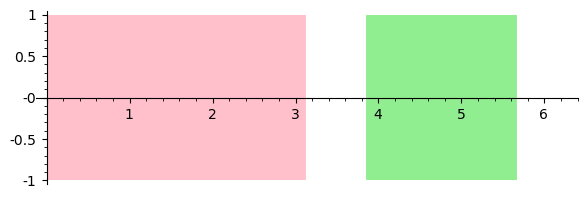

In [19]:
csig.refined_signal(2).plot()

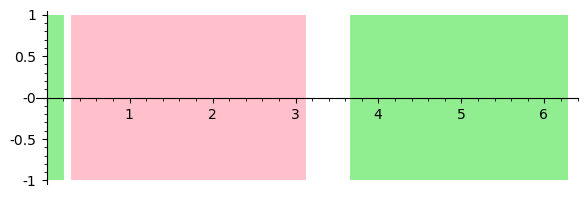

In [20]:
expected = Signal(
    RIF(0.0000000000000000, 6.2831853071795872),
    [(RIF(0.0000000000000000 , 0.19638079084936209), True),
     (RIF(0.29457118627404310, 3.1420926535897933 ), False),
     (RIF(3.6330446307131989 , 6.2831853071795872 ), True)],
)
expected.plot()

In [21]:
prop

C({y: [1 .. 5]}, G([0.39269908169872413 .. 0.39269908169872420], Atomic(x + 0.50000000000000000?)))

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[4.0000000000000000 .. 9.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [4.0..9.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
computing sig
PolyObserver(x + 5, <flowstar.reachability.Reach object at 0x7fbd06fd7c80>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.48 seconds
roots = [[0.69516465888642742 .. 2.7900000000000201], [6.9780930661342148 .. 9.0706174267373872], [13.259999999998322 .. 15.358751205014289]]
domain = [0.0000000000000000 .. 18.848555921538762]
roots = [[0.69516465888642742 .. 2.7900000000000201], 
 [6.9780930661342148 .. 9.0706174267373872], 
 [13

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


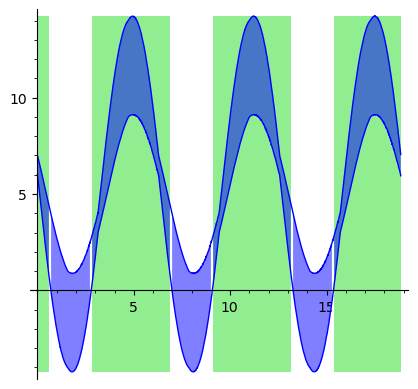

In [22]:
Atomic(x + 5).visualize(system.with_y0([RIF(1, 2), RIF(4, 9)]), 6*pi, order=10, step=0.01)

In [23]:
csig = G(RIF(pi/8), Atomic(x + 0.5)).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 67 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, -y symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.00000

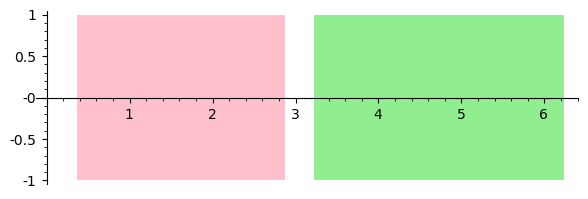

In [24]:
csig.signal.plot()

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.4581831943385093]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.40711170

top-level root detection: 1 items in 0.05 seconds
roots = [[0.44703668751374747 .. 0.53788587863095139], [3.3348727957041495 .. 3.4150662564681125]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.44703668751374747 .. 0.53788587863095139], 
 [3.3348727957041495 .. 3.4150662564681125]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.44703668751374747 .. 0.53788587863095139], 
 [3.3348727957041495 .. 3.4150662564681125]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.55597048275638139 .. 0.64524080704759091], [3.4560299371598732 .. 3.5372911894611843]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.55597048275638139 .. 0.64524080704759091], 
 [3.4560299371598732 .. 3.5372911894611843]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.55597048275638139 .. 0.64524080704759091], 
 [3.4560299371598732 .. 3.5372911894611843]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

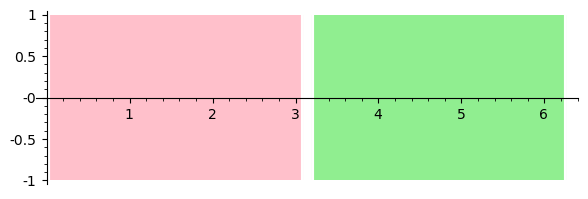

In [25]:
csig.refined_signal(2).plot()

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.46162062835032297 .. 0.51577798555648081], [3.2978520946802043 .. 3.3440878141858148]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.46162062

top-level root detection: 1 items in 0.03 seconds
roots = [[0.50959935656471144 .. 0.56276818924103167], [3.3640499819703233 .. 3.4092123613016874]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.50959935656471144 .. 0.56276818924103167], 
 [3.3640499819703233 .. 3.4092123613016874]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.50959935656471144 .. 0.56276818924103167], 
 [3.3640499819703233 .. 3.4092123613016874]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.41818416972290833 .. 0.46377788729634090], [3.3042300072659833 .. 3.3432113103021784]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.41818416972290833 .. 0.4637778872

top-level root detection: 1 items in 0.03 seconds
roots = [[0.47584206081467639 .. 0.52047168860627647], [3.3669199064678139 .. 3.4061871274550360]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.57116169681063355 .. 0.62243385461438572], [3.4326487698993424 .. 3.4796703208231073]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.57116169681063355 .. 0.62243385461438572], 
 [3.4326487698993424 .. 3.4796703208231073]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.57116169681063355 .. 0.62243385461438572], 
 [3.4326487698993424 .. 3.4796703208231073]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.62792929854275703 .. 0.67983068211390452], [3.4985672138826968 .. 3.5450635004068532]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.62792929854275703 .. 0.67983068211390452], 
 [3.4985672138826968 .. 3.5450635004068532]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.62792929854275703 .. 0.67983068211390452], 
 [3.4985672138826968 .. 3.5450635004068532]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.53002922164935240 .. 0.57559539523119053], [3.4267990520207116 .. 3.4675250185782960]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.53002922164935240 .. 0.5755953952

top-level root detection: 1 items in 0.03 seconds
roots = [[0.54099515569946676 .. 0.58459287796872650], [3.4474016863466228 .. 3.4865824266822152]]
domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.54099515569946676 .. 0.58459287796872650], 
 [3.4474016863466228 .. 3.4865824266822152]]
seg_domain = [0.0000000000000000 .. 6.6758843888783118]
roots = [[0.54099515569946676 .. 0.58459287796872650], 
 [3.4474016863466228 .. 3.4865824266822152]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd06fd77d0>, (

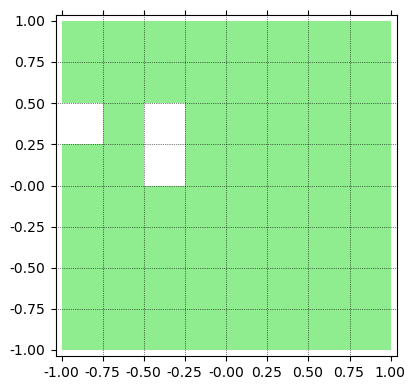

In [26]:
csig.plot_histogram2d(3)

In [27]:
csig = Atomic(x + 0.5).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 3.5762786865234375e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbe9a0538c0>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe9a0538c0>, (([-1.0000000000 , -1.0000

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.4581831943385093]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.40711170

top-level root detection: 1 items in 0.02 seconds
roots = [[0.47563136952959811 .. 0.57555031010629332], [3.3489609103222104 .. 3.4345632934160979]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47563136952959811 .. 0.57555031010629332], 
 [3.3489609103222104 .. 3.4345632934160979]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47563136952959811 .. 0.57555031010629332], 
 [3.3489609103222104 .. 3.4345632934160979]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.44656198334417823 .. 0.49565897052359559], [3.3152050935321191 .. 3.3573572183144287]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.44656198334417823 .. 0.49565897052359559], 
 [3.3152050935321191 .. 3.3573572183144287]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.44656198334417823 .. 0.49565897052359559], 
 [3.3152050935321191 .. 3.3573572183144287]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.50635392121338251 .. 0.55504311725946432], [3.3816613247997509 .. 3.4242679078130869]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50635392121338251 .. 0.55504311725946432], 
 [3.3816613247997509 .. 3.4242679078130869]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50635392121338251 .. 0.55504311725946432], 
 [3.3816613247997509 .. 3.4242679078130869]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.41818416972290833 .. 0.46377788729634090], [3.3042300072659833 .. 3.3432113103021784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41818416972290833 .. 0.46377788729634090], 
 [3.3042300072659833 .. 3.3432113103021784]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41818416972290833 .. 0.46377788729634090], 
 [3.3042300072659833 .. 3.3432113103021784]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.47584206081467639 .. 0.52047168860627647], [3.3669199064678139 .. 3.4061871274550360]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47584206081467639 .. 0.52047168860627647], 
 [3.3669199064678139 .. 3.4061871274550360]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.58854013899149060 .. 0.68685662188439145], [3.4753309920265813 .. 3.5635533466982823]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58854013899149060 .. 0.68685662188439145], 
 [3.4753309920265813 .. 3.5635533466982823]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58854013899149060 .. 0.68685662188439145], 
 [3.4753309920265813 .. 3.5635533466982823]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.56348570911865525 .. 0.61045450205115893], [3.4456891023373645 .. 3.4890663748791289]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56348570911865525 .. 0.61045450205115893], 
 [3.4456891023373645 .. 3.4890663748791289]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56348570911865525 .. 0.61045450205115893], 
 [3.4456891023373645 .. 3.4890663748791289]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.61657519738301636 .. 0.66405545561924651], [3.5061646712543024 .. 3.5493898106188784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.61657519738301636 .. 0.6640554556

top-level root detection: 1 items in 0.04 seconds
roots = [[0.53002922164935240 .. 0.57559539523119053], [3.4267990520207116 .. 3.4675250185782960]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53002922164935240 .. 0.57559539523119053], 
 [3.4267990520207116 .. 3.4675250185782960]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53002922164935240 .. 0.57559539523119053], 
 [3.4267990520207116 .. 3.4675250185782960]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.56602477426960184 .. 0.60801409886506197], [3.4749187655019704 .. 3.5137823896301863]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56602477426960184 .. 0.60801409886506197], 
 [3.4749187655019704 .. 3.5137823896301863]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.56602477426960184 .. 0.60801409886506197], 
 [3.4749187655019704 .. 3.5137823896301863]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04341050>, (

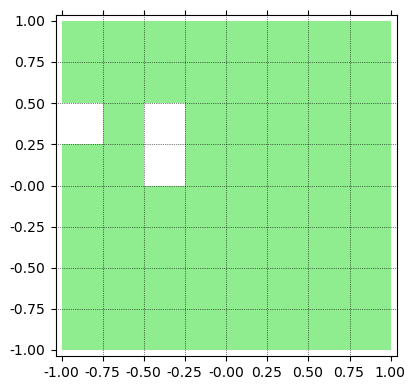

In [60]:
csig.G(pi/8).plot_histogram2d(3)

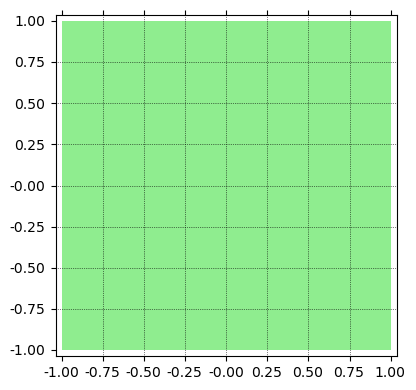

In [61]:
csig.G(pi/16).plot_histogram2d(3)

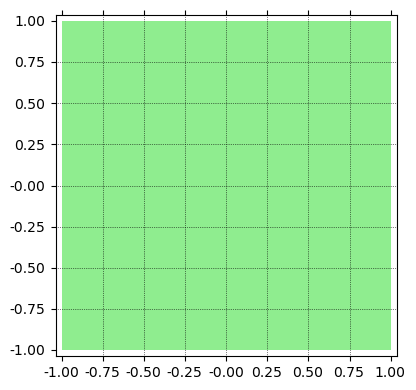

In [62]:
csig.G(pi/32).plot_histogram2d(3)

In [64]:
@interact
def _(t0=slider(0,0.30, step_size=0.001), auto_update=False):
    return csig.G(t0*pi).plot_histogram2d(3)

Manual interactive function <function _ at 0x7fbd1f3a2dd0> with 1 widget
  t0: TransformFloatSlider(value=0.0,…

In [31]:
Text?

In [69]:
a = animate(
    [csig.G(t0*pi).plot_histogram2d(4)
         + text(f"t = {t0}$\\pi$", (5, 0.4))
     for t0 in srange(0, 0.30, 0.005)])

In [33]:
#a.apng(savefile='images/animation3.apng', show_path=True)

Animation saved to file images/animation3.apng.


In [34]:
#from IPython.display import Image

In [66]:
#html(Image(url='images/animation3.apng', embed=False)._repr_html_())

In [70]:
a.ffmpeg(savefile='images/animation7.webm', ffmpeg_options="-threads 8 -lossless 1", delay=30)

In [71]:
html("<video src='images/animation7.webm' autoplay loop playsinline />")

<video src='images/animation7.webm' autoplay loop playsinline />

In [25]:
csig2 = Atomic(x + 0.5).context_signal_for_system(
    system.with_y0([RIF(1, 2), RIF(3, 4)]),
    2*sage.pi,
    restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE,
)

calling reach with y0 = ['[1.0000000000000000 .. 2.0000000000000000]', '[3.0000000000000000 .. 4.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [1.0..2.0]
C = [3.0..4.0]
contexts = ['[1.0..2.0]', '[3.0..4.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 2.86102294921875e-06 sec
PolyObserver(x + 0.50000000000000000?, <flowstar.reachability.Reach object at 0x7fbe62c16320>, -y, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -y
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe62c16320>, (([-1.0000000000 , -1.000000

In [21]:
csig.G(0.19*pi).children[1].children[1].signal(0)

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2)), <flowstar.reachability.Reach object at 0x7fbe62a5d230>, , symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b''
fprime = 
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.19 seconds
roots = [[0.0000000000000000 .. 6.2841853071785865]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.0000000000000000 .. 6.2841853

top-level root detection: 1 items in 0.05 seconds
roots = []
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = []
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = []
signal given bool roots: 1 items in 0.00 seconds


In [22]:
csig2.__class__.__name__

'ContextSignal'

In [23]:
csig2.G(0.19*pi).children[1].children[1].signal(0)

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbe57f38410>, (([-1.0000000000 , -1.0000000000] * y)), symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.40711170307470173 .. 0.61454667659701901], [3.2805120832265517 .. 3.

False

In [28]:
@interact
def _(t0=slider(0,0.30, step_size=0.001), auto_update=False):
    p1 = csig2.G(t0*pi).plot_histogram2d(3)
    p2 = csig.G(t0*pi).plot_histogram2d(3)
    return graphics_array([
        p1,
        p2,
    ], nrows=1, ncols=2)

Manual interactive function <function _ at 0x7fbe57d88950> with 1 widget
  t0: TransformFloatSlider(value=0.0,…

In [86]:
a = animate(
    [csig2.G(t0*pi).plot_histogram2d(4)
         + text(f"t = {t0}$\\pi$", (5, 0.4))
     for t0 in srange(0, 0.30, 0.005)])

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.47072793662870432 .. 0.49905639711464412], [3.3011011382843999 .. 3.3243301381483735]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47072793

var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.47043638177668894 .. 0.49753256708445504], [3.3136769281903561 .. 3.3361838589149580]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47043638177668894 .. 0.49753256708445504], 
 [3.3136769281903561 .. 3.3361838589149580]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots 

top-level root detection: 1 items in 0.04 seconds
roots = [[0.49447078335979854 .. 0.52048130609477628], [3.3466384069061043 .. 3.3690446411052788]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.49447078335979854 .. 0.52048130609477628], 
 [3.3466384069061043 .. 3.3690446411052788]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.49447078335979854 .. 0.52048130609477628], 
 [3.3466384069061043 .. 3.3690446411052788]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.43858209041973933 .. 0.46325984752845884], [3.3017282136817884 .. 3.3224202694500274]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.43858209041973933 .. 0.46325984752845884], 
 [3.3017282136817884 .. 3.3224202694500274]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.43858209041973933 .. 0.46325984752845884], 
 [3.3017282136817884 .. 3.3224202694500274]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.46228438721363857 .. 0.48657731799057219], [3.3326743912159293 .. 3.3534357021814212]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46228438721363857 .. 0.48657731799057219], 
 [3.3326743912159293 .. 3.3534357021814212]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46228438721363857 .. 0.48657731799057219], 
 [3.3326743912159293 .. 3.3534357021814212]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.51081682386103666 .. 0.53651951565479140], [3.3642853576576636 .. 3.3870063198773784]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51081682386103666 .. 0.53651951565479140], 
 [3.3642853576576636 .. 3.3870063198773784]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51081682386103666 .. 0.53651951565479140], 
 [3.3642853576576636 .. 3.3870063198773784]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57614440414804068 .. 0.60263182768116364], [3.4264398376710247 .. 3.4501582734534262]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57614440414804068 .. 0.60263182768116364], 
 [3.4264398376710247 .. 3.4501582734534262]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57614440414804068 .. 0.60263182768116364], 
 [3.4264398376710247 .. 3.4501582734534262]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.50901141399713834 .. 0.53362580473135113], [3.3734566074539316 .. 3.3955704342670346]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50901141399713834 .. 0.53362580473135113], 
 [3.3734566074539316 .. 3.3955704342670346]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.50901141399713834 .. 0.53362580473135113], 
 [3.3734566074539316 .. 3.3955704342670346]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.01 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.54785052415656276 .. 0.5732497

self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.40885713988087707 .. 0.43209462253178177], [3.2793608415589932 .. 3.2994167555793897]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.40885713

top-level root detection: 1 items in 0.03 seconds
roots = [[0.41086498868406723 .. 0.43327414665157327], [3.2912199028391508 .. 3.3104287696820216]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41086498868406723 .. 0.43327414665157327], 
 [3.2912199028391508 .. 3.3104287696820216]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.41086498868406723 .. 0.43327414665157327], 
 [3.2912199028391508 .. 3.3104287696820216]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.37729667555976920 .. 0.39903863187498407], [3.2686031779135764 .. 3.2868796722299770]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.37729667555976920 .. 0.39903863187498407], 
 [3.2686031779135764 .. 3.2868796722299770]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.37729667555976920 .. 0.39903863187498407], 
 [3.2686031779135764 .. 3.2868796722299770]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.42706802934065957 .. 0.44891906469090365], [3.3177730376132363 .. 3.3366344750266950]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.42706802934065957 .. 0.4489190646

top-level root detection: 1 items in 0.04 seconds
roots = [[0.46969038598424367 .. 0.49365978944980277], [3.3459708645092134 .. 3.3664449534851278]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46969038598424367 .. 0.49365978944980277], 
 [3.3459708645092134 .. 3.3664449534851278]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46969038598424367 .. 0.49365978944980277], 
 [3.3459708645092134 .. 3.3664449534851278]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.46238161067187294 .. 0.48492041260064656], [3.3519095645860019 .. 3.3713619630155485]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46238161067187294 .. 0.48492041260064656], 
 [3.3519095645860019 .. 3.3713619630155485]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46238161067187294 .. 0.48492041260064656], 
 [3.3519095645860019 .. 3.3713619630155485]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.45548807417082914 .. 0.47750564022523412], [3.3486451014573850 .. 3.3677561664450498]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.45548807417082914 .. 0.47750564022523412], 
 [3.3486451014573850 .. 3.3677561664450498]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.45548807417082914 .. 0.47750564022523412], 
 [3.3486451014573850 .. 3.3677561664450498]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.46242529619357247 .. 0.48417877957887723], [3.3603791786275296 .. 3.3794059896195799]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46242529619357247 .. 0.48417877957887723], 
 [3.3603791786275296 .. 3.3794059896195799]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.46242529619357247 .. 0.48417877957887723], 
 [3.3603791786275296 .. 3.3794059896195799]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObse

top-level root detection: 1 items in 0.03 seconds
roots = [[0.59124434190104357 .. 0.61792249368839381], [3.4439490334760480 .. 3.4678288185164302]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.59124434190104357 .. 0.61792249368839381], 
 [3.4439490334760480 .. 3.4678288185164302]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.59124434190104357 .. 0.61792249368839381], 
 [3.4439490334760480 .. 3.4678288185164302]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.58627736048325607 .. 0.61179087869804139], [3.4503779862664956 .. 3.4732654403842372]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58627736048325607 .. 0.61179087869804139], 
 [3.4503779862664956 .. 3.4732654403842372]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.58627736048325607 .. 0.61179087869804139], 
 [3.4503779862664956 .. 3.4732654403842372]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.62536819658858056 .. 0.65109791949699525], [3.4887937569742231 .. 3.5121054423875058]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62536819658858056 .. 0.65109791949699525], 
 [3.4887937569742231 .. 3.5121054423875058]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62536819658858056 .. 0.65109791949699525], 
 [3.4887937569742231 .. 3.5121054423875058]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObse

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.53596642780496706 .. 0.55996695638768379], [3.4145095794000992 .. 3.4356006912262025]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53596642780496706 .. 0.55996695638768379], 
 [3.4145095794000992 .. 3.4356006912262025]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53596642780496706 .. 0.55996695638768379], 
 [3.4145095794000992 .. 3.4356006912262025]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.00

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57274333203084193 .. 0.59744874179507768], [3.4510466742405037 .. 3.4727353426055250]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57274333203084193 .. 0.59744874179507768], 
 [3.4510466742405037 .. 3.4727353426055250]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57274333203084193 .. 0.59744874179507768], 
 [3.4510466742405037 .. 3.4727353426055250]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (([-1.0000000000 , -1.0000000000] * y)) symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
fprime = (([-1.0000000000 , -1.0000000000] * y))
self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.62918295313710559 .. 0.65439418139447337], [3.4991160045598492 .. 3.5220000716019016]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62918295313710559 .. 0.6543941813

top-level root detection: 1 items in 0.03 seconds
roots = [[0.69029752699460478 .. 0.71583481707959185], [3.5596722565947702 .. 3.5836113878466512]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.69029752699460478 .. 0.71583481707959185], 
 [3.5596722565947702 .. 3.5836113878466512]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.69029752699460478 .. 0.71583481707959185], 
 [3.5596722565947702 .. 3.5836113878466512]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.62319748437758593 .. 0.64729246870587110], [3.5032783829450528 .. 3.5251003640399521]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62319748437758593 .. 0.64729246870587110], 
 [3.5032783829450528 .. 3.5251003640399521]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62319748437758593 .. 0.64729246870587110], 
 [3.5032783829450528 .. 3.5251003640399521]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

self.reach.vars = [x, y]
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.62684140275399569 .. 0.65047088910449758], [3.5125891730024538 .. 3.5341213515771619]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62684140275399569 .. 0.65047088910449758], 
 [3.5125891730024538 .. 3.5341213515771619]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.62684140275399569 .. 0.65047088910449758], 
 [3.5125891730024538 .. 3.5341213515771619]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.00

top-level root detection: 1 items in 0.03 seconds
roots = [[0.51191405454122407 .. 0.53426148992228318], [3.4017907837313421 .. 3.4216678261082243]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51191405454122407 .. 0.53426148992228318], 
 [3.4017907837313421 .. 3.4216678261082243]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.51191405454122407 .. 0.53426148992228318], 
 [3.4017907837313421 .. 3.4216678261082243]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.53888893309977203 .. 0.56157234451409821], [3.4319223416864215 .. 3.4521526259726603]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53888893309977203 .. 0.56157234451409821], 
 [3.4319223416864215 .. 3.4521526259726603]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.53888893309977203 .. 0.56157234451409821], 
 [3.4319223416864215 .. 3.4521526259726603]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.05 seconds
roots = [[0.47550556658554538 .. 0.49673360793104405], [3.3826331393549646 .. 3.4010570268914800]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47550556658554538 .. 0.49673360793104405], 
 [3.3826331393549646 .. 3.4010570268914800]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.47550556658554538 .. 0.49673360793104405], 
 [3.3826331393549646 .. 3.4010570268914800]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.57359672344598167 .. 0.59690540394165648], [3.4663372289645635 .. 3.4872659037570851]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57359672344598167 .. 0.59690540394165648], 
 [3.4663372289645635 .. 3.4872659037570851]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.57359672344598167 .. 0.59690540394165648], 
 [3.4663372289645635 .. 3.4872659037570851]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.02 seconds
roots = [[0.60865400958239967 .. 0.63119074592278202], [3.5013264910857881 .. 3.5220068194256995]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.60865400958239967 .. 0.63119074592278202], 
 [3.5013264910857881 .. 3.5220068194256995]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.60865400958239967 .. 0.63119074592278202], 
 [3.5013264910857881 .. 3.5220068194256995]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.04 seconds
roots = [[0.54150362870532953 .. 0.56300422238121007], [3.4476562940446133 .. 3.4669696313174186]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.54150362870532953 .. 0.56300422238121007], 
 [3.4476562940446133 .. 3.4669696313174186]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.54150362870532953 .. 0.56300422238121007], 
 [3.4476562940446133 .. 3.4669696313174186]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

top-level root detection: 1 items in 0.03 seconds
roots = [[0.55884897168696512 .. 0.57994350529285477], [3.4706088670808150 .. 3.4900020061284809]]
domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.55884897168696512 .. 0.57994350529285477], 
 [3.4706088670808150 .. 3.4900020061284809]]
seg_domain = [0.0000000000000000 .. 6.2831853071795872]
roots = [[0.55884897168696512 .. 0.57994350529285477], 
 [3.4706088670808150 .. 3.4900020061284809]]
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
running f_bool: 1 items in 0.00 seconds
signal given bool roots: 1 items in 0.00 seconds
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x))'
var_names = [b'local_t', b'x', b'y']
res = b'(([-1.0000000000 , -1.0000000000] * y))'
PolyObserver((([0.5000000000 , 0.5000000000]) + ([1.0000000000 , 1.0000000000] * x)), <flowstar.reachability.Reach object at 0x7fbd04768d70>, (

In [88]:
a.ffmpeg(savefile='images/animation9.webm', ffmpeg_options="-threads 8 -lossless 1", delay=30)

In [89]:
html("<video src='images/animation9.webm' autoplay loop playsinline />")

<video src='images/animation9.webm' autoplay loop playsinline />

In [7]:
def mval(x, y):
    val = RIF((var("x")^2 + var("y")^2)({var("x"): x, var("y"): y}))
    if val.upper() < 4:
        return 1
    elif val.lower() > 4:
        return -1
    else:
        return 0

In [8]:
from matplotlib.colors import LinearSegmentedColormap

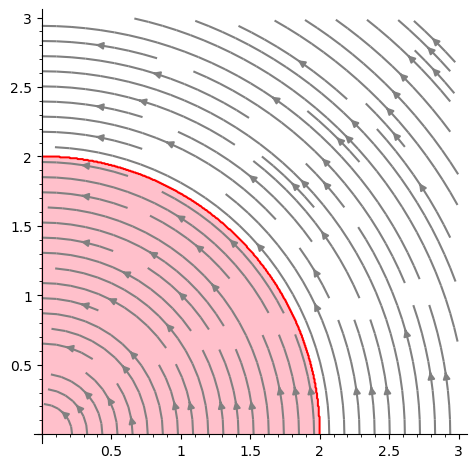

In [8]:
p = streamline_plot(tuple(sys.y),(x,0,3),(y,0,3), color='grey')\
    + region_plot((lambda x, y: x^2 + y^2 < 4),
                  (x, 0, 3),
                  (y, 0, 3),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1)
p.show()

In [8]:
csig = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=True,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 4.5299530029296875e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f125c4556e0>, 0, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000

In [ ]:
dir(csig)

In [9]:
csig2 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 4.291534423828125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f1270e46230>, 0, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000

In [10]:
csig3 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    tentative_unpreconditioning=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 3.0994415283203125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f1270e46140>, 0, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.0

In [12]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f12544b8050> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [13]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig2.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f1254408050> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [14]:
@interact
def _(n=slider(0,10, step_size=1), auto_update=False):
    with suppress_stdout():
        return csig3.plot_histogram2d(n)

Manual interactive function <function _ at 0x7f12543db7a0> with 1 widget
  n: TransformIntSlider(value=0, desc…

In [18]:
@interact
def _(N=slider(1,10, step_size=1), auto_update=True):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[mval(RIF(x, x+step),RIF(y, y+step)) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Interactive function <function _ at 0x7f1270dbb5f0> with 1 widget
  N: TransformIntSlider(value=1, description…

In [18]:
reach = system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [20]:
reach.successful

True

In [21]:
reach2 = system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True, initial_form=InitialForm.SPLIT_VARS)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [61]:
reach(0)

[0.?e1, 0.?e1]

In [75]:
reach.context_dim

2

In [76]:
reach.initial_form

<InitialForm.COMBINED: 1>

In [62]:
[m.str(style='brackets') for m in reach(0)]

['[-1.1990219737958796e-10 .. 3.0000000001198100]',
 '[-1.2027133177755047e-10 .. 3.0000000001194410]']

In [74]:
RIF((4 - var("x")^2 - var("y")^2)({x: RIF(0, 3), y: RIF(0, 3)})).str(style='brackets')

'[-14.000000000000000 .. 4.0000000000000000]'

In [63]:
obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach)

PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fbe56d9b500>, None, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [64]:
obs(0).str(style='brackets')

'[-14.000000001435508 .. 4.0000000007205215]'

In [65]:
robs = RestrictedObserver(obs, [RIF(0.5, 0.625), RIF(-1.0, -0.825)])

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]


In [66]:
robs(0).str(style='brackets')

'[-2.0103125006467808 .. -1.0624999994288681]'

In [93]:
obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach2)

PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fbe57f38aa0>, None, symbolic_composition=False, tentative_unpreconditioning=False, mask=None)


In [94]:
obs(0).str(style='brackets')

'[-14.000000001435514 .. 4.0000000007205241]'

In [96]:
robs = RestrictedObserver(obs, [RIF(0.5, 0.625), RIF(-1.0, -0.825)])

restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]


In [97]:
robs(0).str(style='brackets')

'[-2.0103125006467826 .. -1.0624999994288681]'

In [13]:
def f(m):
    return 3*((m + 1)/2)


def finv(m):
    return 2*m/3 - 1


In [14]:
f(finv(var("s")))

s

In [15]:
finv(f(var("s")))

s

In [92]:
RIF((4 - var("x")^2 - var("y")^2)({x: f(RIF(0.5, 0.625)), y: f(RIF(-1.0, -0.825))})).str(style='brackets')

'[-2.0103125000000004 .. -1.0625000000000000]'

In [91]:
f(0)

3/2

In [99]:
[m.str(style='brackets') for m in robs.roots()]

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.80000000000000004 .. 0.80000000000000005], [1.5999999999999998 .. 1.6000000000000001], [2.3999999999999994 .. 2.4000000000000004], [3.1999999999999988 .. 3.2000000000000007], [3.9999999999999982 .. 4.0000000000000009], [4.7999999999999971 .. 4.8000000000000016], [5.5999999999999960 .. 5.6000000000000024], [6.3999999999999950 .. 6.4000000000000031]]


['[0.80000000000000004 .. 0.80000000000000005]',
 '[1.5999999999999998 .. 1.6000000000000001]',
 '[2.3999999999999994 .. 2.4000000000000004]',
 '[3.1999999999999988 .. 3.2000000000000007]',
 '[3.9999999999999982 .. 4.0000000000000009]',
 '[4.7999999999999971 .. 4.8000000000000016]',
 '[5.5999999999999960 .. 5.6000000000000024]',
 '[6.3999999999999950 .. 6.4000000000000031]']

In [10]:
def rval(t0, x, y, symbolic_composition=False):
    #print(f"x = {x.str(style='brackets')}; y = {y.str(style='brackets')}")
    x = finv(x)
    y = finv(y)
    #print(f"x' = {x.str(style='brackets')}; y' = {y.str(style='brackets')}")
    with suppress_stdout():
        obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach, symbolic_composition=symbolic_composition)
        robs = RestrictedObserver(obs, [x, y])
        res = robs(t0)
    if res.lower() > 0:
        return 1
    elif res.upper() < 0:
        return -1
    else:
        return 0

In [11]:
@interact
def _(N=slider(1,10, step_size=1), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(0, RIF(x, x+step),RIF(y, y+step)) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7fe5b3af07a0> with 1 widget
  N: TransformIntSlider(value=1, desc…

In [21]:
csig1 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=True,
    restriction_method=RestrictionMethod.SYMBOLIC,
)
csig2 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 1.9073486328125e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7fe5b1406e60>, 0, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=()
ContextSignal with coord=() and children=None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
var_names = [b'local_t', b'x', b'y']
res = b'(([4.0000000000 , 4.0000000000]) + ([-1.0000000000 , -1.0000000000] * y^2) + ([-1.0000000000 , -1.0000000000] * x^2))'
var_names = [b'local_t', b'x', b'y']
res = b''
PolyObserver((([4.000000

In [19]:
@interact
def _(N=slider(1,10, step_size=1), t0=slider(0, 2, step_size=1/32),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(t0*pi, RIF(x, x+step),RIF(y, y+step), symbolic_composition=symbolic_composition) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7fe5b3aa8680> with 3 widgets
  N: TransformIntSlider(value=1, des…

In [24]:
@interact
def _(N=slider(1,10, step_size=1), t0=slider(0, 2, step_size=1/32),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    csig = csig1 if symbolic_composition else csig2
    with suppress_stdout():
        return csig.G(t0*pi).plot_histogram2d(N)

Manual interactive function <function _ at 0x7fe5b1087200> with 3 widgets
  N: TransformIntSlider(value=1, des…